In [1]:
from nltk import FreqDist
import pyLDAvis 
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import gensim
import pickle
from gensim import corpora
import spacy
from new_truncatedSVD import preprocess
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from termcolor import colored
import numpy as np
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
%matplotlib inline


/home/gayatri/adEnv/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/home/gayatri/adEnv/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/home/gayatri/adEnv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gayatri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gayatri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
filename = 'assets/finalized_model.sav'
model = pickle.load(open(filename, 'rb'))
nlp = spacy.load("en_core_web_sm")

In [6]:
# transcription_list = ["Hi, let's talk about my experience with instacart today. I used instacart because I had a twenty dollar off promo. However, I will use instacart again, items are easy to find everything. I wanted was in stock. My order received quickly and was correct and everything was packaged. Very nicely. Thank you.", "It was very easy to navigate on the app love that they have. Most of the things that I usually buy at Walmart or Target. So it's very convenient for me to use and shows up within a few days. We'll definitely be using this app again.", "All right. First question. How was your experience with instacart went really smooth? Didn't have any problems. Super simple. Just straightforward. Go in, get it, it all with it. Everything came just as the site said, it would no issues with the delivery person, just easier than going and getting it ourselves. On the, how did you navigate the site to find products you added to your cart went in? Looked it all up on the search bar for each of the different things. Found the specific item that we needed the quantity clicked on it and send it to the cart and went and found. The next thing in terms of what frustrations did. And if any didn't have any at all, so just an all-around good experience. We'll do it again. Thanks.", "My Amazon Pantry experience was actually pretty good at I found most of the stuff I needed. The only thing that I guess they're limiting is like Waters, you can't get more than one pack of waters through Amazon pantry. If it were to have, let me get at least three that would have been fine. But other than that, I think I found everything pretty good.", 'It was pretty easy, filter search was really good. I had no frustrations whatsoever.', "Hi, my experience with Instagram was very good. I just but I was like looking for the product in the email and the internet and then I'm by the product in Costco and then send all the information to them to come to my house. I was a very excellent experience. Thank you.", "I shop online at Amazon all the time. I recently bought groceries from Amazon Prime, which I do on a pretty regular basis, because you can get them cheaper than some other places and faster and they deliver it right to your door. I didn't have any problems with Amazon Prime Pantry thisTime, I found everything I was looking for. I was able to order it all at one time and have it delivered. When they said it would, which is pretty normal. I love Amazon, everything about Amazon. They're shipping is good. Their Prime Pantry is good. All other aspects of Amazon is good. I can always find what I need in the pantry and they will ship it to me. Free of charge. Thank you.", "It's Court to order my food online. It's pretty easy to use website. If you go on my end.", 'I had no difficulties using instacart for BevMo. I was able to easily search for the products I wanted and then they were delivered right to my door. All I needed was my ID and they scanned, it dropped off, easy peasy. And that was it.', "I mainly like shopping instacart because I have a bad back and I have somebody else get the items I need for me and they'll even bring them inside the door for me, wearing a mask, which is great. And I like having the ease of shopping online and getting what I need and knowing what time it'll be here.", "Okay, how is my experience? My experience was good? Not excellent. But good. How did I find navigating to the site to find my products? The search bar was clearly defined that part was fine. Some difficulty, finding specific products. I wanted I've come to learn that. Some manufacturers have stopped manufacturing, their Specialty Products. So that affected instacart searches as well. Some products are harder to find. I have to be very Specific, what frustrations did I experience having to be very specific on some items? Some of the items not being found.", 'Amazon. Pantry was great. You got my stuff quick. Ate it all. Thank you.', "The other day, I needed some groceries delivered. Some of my father's home. And I looked on instacart period. He loves BJ's and he specifically likes their deli department. So I went on there and I ordered some of his Deli foods and then I got a few other things that he needed when it was time for The Shopper to shop.I noticed I got everything right away and it took them quite a while to get the two items. They needed in the deli. Overall, they shop pretty quickly. They got me everything that I needed and I was pleased, the only Disappointing thing is the surcharge that instacart charges. It's at least 20 percent more than the price in the store. And that plus is delivery. Charge, plus a tip adds up to quite a lot.", "My experience was super easy. I tried to find a liquor store that would deliver a bottle of champagne to a client and I couldn't. Therefore, I went to instacart and they were able to do so it was quick. It was easy and they delivered it on time.", "My recent experience was in with instacart is actually really good. I was able to get all the groceries that we needed and the delivery was timely and they're always open slots for delivery. So it's not that hard to get her items delivered. We've been using instacart more during this time just because you know, less Worry and anxiety of going to the grocery store. And I guess one downside is that most of the time, some of the items that that we are looking for, is not available, but it's still totally understandable, given given the time, you know, that we are in now, so, I have been, I have, I've been really happy with the experience so far and I think I'll continue using it.", "Amazon Fresh, you guys want to know about Amazon Fresh? Well, I love it. I like it. Especially during a pandemic. It comes in very handy. I navigate through the site so easily, I shop all the time. I shop in the middle of the night. If I remember something I can add it to my list easily. It'll tell me if something is not in stock or not. And I like that, sometimes, it will just reappear, and you're just to re-check, but that's okay. I don't mind. They have products that nobody else really has. Everything is fresh. I got to say everything is so fresh. Rarely my one complaint this sometimes on produce. I'll find like a half a rotten onion or a little bit of the garlic is no good. So sometimes we produce it's a little bit of a problem. But for the most part everything is really fresh. It's wrapped. Okay, some stuffs gets flattened a little bit and if it's something that's really damaged, I can call and complain and they will either replace it or refunds me. So thank you, Amazon Fresh.", 'We heard about instacart through a mutual friend. And during the covid-19 pandemic. We needed some way to deliver groceries to my grandparents. That would be minimal contact. And so, we gave it a try. The first time. We really enjoyed it. So we purchased a subscription and now our whole family uses it.', "My experience with Amazon Pantry was amazing. I'm glad that I'm able to use snap on the computer with delivery, you know, and what's even better is that if with Amazon pantry if you're a Prime member $35 and over you don't need to pay a delivery fee. Thank you guys. Thanks.", "I recently ordered ice tea, and gluten-free cookie mix on Amazon market and the only issue I had was Finding. One the cookies that weren't like a box of six. It was just one or two, so it wasn't really trouble. It was just not spending $30 on a case of six mixes. The iced tea was fine little expensive but whatever can't find it in the market. So, count on Amazon, overall. The experience was fine. No issues. Just searching finding what I wanted. Put it in my cart. Paying shipping, but whatever. No big deal, no real frustrations. Finding what I wanted. Making sure. I wasn't paying additional shipping from, like, an individual seller found everything. I wanted. That was it. Thank you.", "The order I took from Amazon, pantry is really good. Like I said, I couldn't find the product anywhere else, and I was glad to find a little bit more expensive than I had paid before, but no, again. I had a great experience. Thank you.", 'Shopping with instacart was very easy to find the store that I needed and select the items that I wanted, and then having delivery was not difficult. So overall, I would say it was a very good experience and I would definitely use them.', "Hi, my name is Desiree instacart was great. The first order that I did the woman Jennifer replaced everything that they didn't have with better items at a better price. I want, I'm saving $30. She was quick. I put in for the flex delivery and I got it literally. Like I think it was like, um, like want to say like an hour and 15 minutes or so right after very kind the second time that I used it. Also. The gentleman was very nice who's apologizing for something that store didn't have snot as well. But I had a really great experience and that's it. I really appreciate it. Thanks instacart.", "The experience was good. We had some stuff to Shin's that we had to make and they made the right call. I didn't have any stress with the app. It was good. Everything was good. It's easy to navigate.", "So, the first question is, how was my experience using instacart for my Sam's Club order? And I love instacart, and I use it pretty frequently, but this was my first time using it for a Sam's Club order. It was just the usual like easy to browse easy to select things and also to select substitutions and chat. That's one reason why I love instacart and then it was really easy to navigate.8 the site and view the items in my cart because I'm just used to using the app, the frustrations that I had for. The Sam's Club order was, I noticed some of the items that I had picked said, they were in stock on the app and then when my shopper got there, it was out of stock, but it didn't say out of stock on the app. So that was the frustration and then also like the delivery fee was Was a lot more. So I don't know if I'll be using Sam's Club through instacart again, but those were my only two frustrations. Other than that. It was great experience.", "I use instacart quite often. I'm actually overall pretty satisfied with the results. I've been getting with instacart, the Shoppers that I get are usually very good with communicating with me when things are out of stock or a couple of times, I've had to add items and it's super convenient because I have a little one that I don't want to take out into the The open with covid going on. I'm so sorry. So I use Instagram because it's more convenient for me. I love it. A couple of times. I've done the instacart pick up, where I've gone to public, to pick my order up versus having it delivered. And that's just because Publix is right around the corner from me. And sometimes I Is just, is it fits better with my schedule or what have you? And the people who bring my groceries out of always kind.", "My experience shopping with the Amazon Pantry was super. I've found what I was looking for, by just typing in, what products I was looking for. I didn't even have to have a product name. I could just put in snacks, or I can put in paper towels. Plastic silverware. I think those are most of the things that I've looked for lately and it, you know, just would give you a screen, there might be a page or two and you could go through and see what items would fit, what you're looking for. So I place them in my cart and go ahead and pay. And they arrived within a few days. It was really easy and convenient and I probably continue to do a lot of my shopping through the Amazon pantry.", "My experience with Amazon Prime was good. We got a bunch of snacks for the kids like goldfish and B6 another popcorn. So we love you. Papa. It's easy to navigate to the side. All you do is need to go through the Amazon Prime category and Order, $35 or more to get three. Deliveries on all your pantry things and we had no problems either. Either with, getting our food on time. It took two or three days to get it and everything came and decent Condition. Nothing was smashed up. Everything was edible. Yeah, thing was nothing Taste of Bud and that's our feedback. Bye-bye.", "I had a good experience using instacart for Food. Co, I am put it, the some of the items that I wanted specifically other items. I chose based on recommendations. And some things I got that, I wouldn't normally get, but I was able to navigate to the site pretty easily. I didn't have any problems or any questions with using as a card and for food coat.", "I have really enjoyed using instacart. I love that. It's convenient for me to get items where I don't have to leave the house and I can get them right away since I have a premium membership with instacart. So they usually bring my items within two hours of when I order them on the same day. Recently. I used instacart. I believe, on Tuesday of this week. I was kind of feeling a little ill. So it was veryConvenient for me to have someone to bring the groceries to me instead of me having to go out when I wasn't feeling well and there was also an item that I forgot to add to my card. So I had to ease of actually being able to add on an item by chatting with my insta Shopper and my insta Shopper was able to get everything that I needed. Was he brought things to me within Maybe? A little bit over an hour and a half. After I ordered them and everything. I needed, including the item that I had to edit the last minute. So I've had a favorable experience with them and I would recommend them to anyone.", "My experience through cub, and the instacart was very good. I needed to purchase some items for my father and mother through the site because we're not allowed to see them right now due to the quarantine there at an assisted living facility. So it was a good experience. I found everything that I needed. There were there were a couple items that I was not able to find but to navigate I just use the search function and search forThe thing that I know that my mom and dad love, they especially crazy really wanted hard-boiled eggs. So I searched for the hard-boiled eggs and then my dad wanted some meat sticks that had to be supplemented with a different kind that I wanted to do. It was a ham steaks. I wanted him sticks and they ended up changing that to beef sticks, which was fine with me that. So that was basically the only Duration that I had was the certain items that I wanted were not there, but they did substitute it caramel rolls. They didn't have the caramel rolls. They ended up substituting that for another frosted type of role, but all in all it was a good experience. I didn't come across any problems just besides certain items not being there. The Shopper was very friendly, very easy and happy to help me with any questions. I had or any problems. And she kept Me notified, Whenever there was a change in product. So that was nice. And she did go out of her way to help me find a card to add to the package. So that my mom and dad knew who it was from and that it was to help them feel better about not being able to be with family. But yeah, that's about it. I don't think there was anything else. It was a good experience, all in all and I would do it again. I would use them again.", "Hi, this is a review of instacart for, from picking up from fresh. Thyme. The ordering was fairly easy. I could find what I wanted about complaints, not really complained. But obviously, the prices are more expensive on their, the fees. Like when you add everything together, especially during covid. I was paying like 20 to 30 extra dollars by theHi my tip to people which is fine because I was tipping them and I appreciate their going into stuff but that and then not receiving receipts. I actually use apps to make money from receipt. So it is good. If I can have the paper receipt, even if it's not the same price as my regular one. Because I understand that they have to make money somehow but those are the main two things. Finding stuff on the app was easy. The Murray was easy, the lady who just dropped them off, was super nice offered. No touch, which was great. So no real complaints, just things are more expensive when you order on instacart and the fees are not so fun. But you have to weigh it. Do you want to go in store or by someone else?", "So, for my most recent order on Peapod, okay, overall, it was an okay experience. I was able to accomplish what I needed to. I was able to get a delivery written window that in a few days, which is Improvement, because in Prior weeks, prior months it's taken two weeks just to get a delivery window. A lot of things sell out in that two-week period. I was able to get a lot of things that I needed. There were still some things that were unavailable like,Toilet paper and paper towels and disinfecting wipes things that are kind of critical in assessing these right now, but I was able to get kind of Basics like eggs and milk and orange juice that sort of thing. My, I mainly navigate the site by just going to my past purchases or specials and seeing what's either on sale for the week, or what things have purchased in the past. I need to reorder occasionally. I'll I'll search by the navigation, butAnd often, I usually also will use a search word from looking for something specifically. And then one frustration was just you know delivery of scent of fragile products. So my eggs, I would have two dozen eggs. They arrived in a regular plastic shopping bag on their side, bumping up against all the other groceries. So naturally, they arrived damaged and there was like, no special care taken by Peapod to deliver the eggs carefully. I order from Amazon Prime and they this was a challenge for them for a long time, too, and they recently, We started to put eggs in a carton special cartons, that keep them keeping them upright, and they deliver them hand them to you separately, from the rest of the bags. And I think Peapod still has some work to do in that area. Thanks.", "My experience with Amazon. Pantry, the kids, love the food. I'm able to use my food stamp card. It's definitely easy to get through and really easy to select your choices you want and I like it most because I can use my food stamp card on there. So, yeah.", "My experience with Amazon. Pantry, the kids, love the food. I'm able to use my food stamp card. It's definitely easy to get through and really easy to select your choices you want and I like it most because I can use my food stamp card on there. So, yeah.", "Well, I am an avid Amazon Shopper. So, I'm on the site almost daily. I don't purchase daily. But I like to go there just to see what they have and put things in my list, so that I can prioritize and buy things that I want when I can afford them. So shopping for the items that I wanted was easy. I just kind of do a search and items quickly came up and I put them in my basket, so I did not have any Trouble. Finding the things I want. I think that is about it.", "So as far as my experience shopping recently with Amazon Prime Pantry, I guess I'd say I was neutral on it. I've used Prime Pantry several times in the past. So it's not something new to me. I use Amazon a lot. So shopping on it. Navigating the site adding products to the cart. That's easy. And right now, a lot of items are out of stock and not available several times. I would add something to my cart. And by the time I would have my cart ready to check out items would be sold out. And then I'd have to go back and search again for other items. Because when you spend $35, then you get the free shipping. So then I wanted to make sure I had free shipping in addition. And the shipping with Amazon is slow, right now needs to be expected, shipping slow everywhere, but it's just not something. I'm used to waiting three weeks for a package from Amazon, but I like the fact that I don't have to leave the house and everything is sent here. So, I can't say I'm totally upset about it because I like the convenience factor. Just a little disappointed.", "So, I deliver came on time. Last week when I had Amazon Fresh. They put my ice cream it with some water bottles here as one of them. The problem is ice cream melted, but it's ice cream, but everything else was fine. What else? Yeah, everything was fine, and it was nicely placed at my doorstep, like not in the way the actual door. Either. So that was nice of him to do for me.", "So, I like using instacart for micro. She needs. It's wonderful sight. Aldi is pretty far from where I live and instacart allows me to shop. One from Aldi without having to leave my house. So did navigation wasn't an issue. The only issue I do have with instacart. Is that the crisis differ?Then store. So when I get my receipt, I would notice that my groceries are a dollar or two cheaper than it was listed on instacart.", "Used Amazon. Pantry actually for the first time not too long ago. I've used Amazon for many many times for many years. This is the first time with Amazon pantry and I thought the overall experience was pretty good. There were site navigation because I would was trying to fulfill the 35 dollar minimum order. I would look at it put stuff in my cart and then go away and come back again. And when I did that it would constantly reset it to just Amazon versus Amazon pantry. So that was a little frustrating to keep needing to click on Amazon, the Amazon, Pantry section to look but not a major issue. I think another frustration with it was It was kind of limited on the different products that were there. I was looking for specific a few specific things. And they did not have it in the Amazon, Pantry section of Amazon. Other than that, yeah, I think the experience rules fairly good. Few minor frustrations. But other than that, good.", 'So my experience is pretty good. Navigating was pretty easy for the most part. And I guess the only Annoying Thing was that they charge more for the products through instacart than they do at Costco. So this like kind of an inflation going on. So that was like, maybe the worst part.', 'My experience with Amazon shopping was pretty good. It was pretty easy to navigate. It was easy to add things to my cart. I had a delay in my shipment because I had Train derailed somewhere up north and it took two extra days. But other than that, I got everything else on time.', "Hi, we were just discussing dinner and we had a really nice breakfast sausage and pancakes, and things like that. Something different from what we normally get. Everything's going. Well. The weather is nice and warm, clear supposed to get a lot of snow. Well, not snow, butRain here. Probably very soon. It is almost Fourth of July weekend. And then that will be the beginning of our monsoon season here in New Mexico. Everything is going well and discussing what to do with our yard. We've got quite a bit going on in the yard. It is pretty pretty nice out there quite a bit of greenery and enjoying that like the weather. Well, it was nice talking with you. I'll talk to you later. Bye.", 'I had a great experience with instacart. No problems with the website. Everything worked out good. No complaints.', "My experience with Amazon Pantry was great. Basically how I did the navigated, the site. I just Was sorting the products from low price, too high price in each category and figuring out what I wanted from there. I have a family of five and my three children are out of school, so they're eating a lot, but I really didn't have any trouble, so it was excellent.", 'Using Costco app to order groceries with so easy. I put in the search bar, what I wanted and I found them. I found tangerines and I found carries and even found Pantene shampoo and conditioner. I had to add them at the end because I closed on my order and it was so easy. The person delivered a right to myhouse right to the my door. I really enjoy using. It Costco is great.', "Amazon. Pantry is nice to use of. You can use the search field. There's three different categories to go find the food that you're looking for fresh Pantry or prime. The most frustrating thing about it is you have to meet a minimum requirement in each category to get free delivery. You can't buy one thing out of each category and hope it adds together to give you free delivery and don't work that way. That's the most frustrating thing. Otherwise Amazon pantry is really good to use. Yes.", "Amazon. Amazon pantry is great. It takes food stamps, takes, you know, your bank card. I had no problems. No issues. There are special deals every day that you can try. If you see something that you like, definitely get it when you can, because sometimes they don't have it the next time.", "So compared to taking this video, which has to be under 100 megabytes long. The Amazon experience was very nice. That price was too high. But the packaging was good. They put the twelve packs into another box to keep them from being damaged. They actually delivered to our house this time, which is not the norm for Amazon. Normally, they delivered to a neighbor's house or tell me that's lost in the mail, and it gets delivered another time. So overall, decent experience", "My experience was okay, except for fresh produce their either come like molded or completely, not even ripe. The site was the was the site easy to navigate. Yes, but I've noticed that not even half of what they offer at the stores, even on the site. And do I have any up, frustrations? I guess my frustrations are just the produce. It's very hit-or-miss. Yeah.", "My experience was great. I found everything I needed to find and it was actually pretty cool. They even tell you options of what substitute just in case. They don't have items that you need. The only thing that frustrates me is that the extra cost like for example of my total was $20. I would have to pay like like maybe $50 just for the whole order. That was the only thing that frustrates me. Everything else is great experience. I love it.", "My experience with Amazon Pantry was a good experience. I got chips cereal pretzels. Some paper plates trying to remember what else can't necessarily remember, but it was a very good experience. Everything came as ordered in a wonderfully sealed box.", "Hi, I've been using Instagram for almost two years in general, really? Really like them. They are usually very prompt. It makes everyday life, super convenient and easy with the kids and being a working mom and all that good stuff. But sometimes you delivery you order things and they're not delivered in the time frame that they say they will be. So that is a little bit inconvenient when you're trying to plan for people to come over and event or something. And then you're Delirious hours hours late, sometimes or early. Sometimes it'll come early and you're not there and your groceries are sitting out in the sun. I've had Happened before, but instacart is always super, super good about handling stuff like that. I have had items missing from orders. I've had extra items added to my orders and they will always refund it and make it right. No. Hassle. Covid has put a bit of a glitch. I guess. It's been much harder to use and the delivery times aren't is guaranteed, but in general, it's pretty good. I'd say people do really well, most of the time. I'm sometimes they don't find products even though you know, they're in the stores and then sometimes, they don't pick good quality produce. Those are probably my biggest qualms that I try and put notes in there. Like, you know, check for Quality first or uses few bags as possible. Because you still do get charged for grocery bags through instacart, which is a bummer because I bring my own bags on a shop on my own. Also. I lost the train of thought. Anyway, overall love instacart. I've been using them for two years. I'll continue to use them. I recommend them to friends very convenient, but there are some drawbacks that seemed seems like pretty easy fixes.", 'Using Amazon, Pantry was very easy to use. I just uploaded my method of payment search for eligible items and it took me right to it. I will be using it again item ship fast and right to my front door. It was very effortless. I recommend using, especially during this pandemic. So, if you wanted to keep your distance from people, I recommend using eBay Pantry. Thank you.', "My Amazon Pantry experience was very good. I found the items. I wanted by using the search bar, and I navigate to The Pantry by using Amazon app, clicking on the menu. And then clicking Pantry. I had no frustrations. No problems. It was great. I enjoy it. It's convenient. Thank you.", "Okay, how was my experience? Um, pretty straightforward, pretty easy. It's usually the same protocol. Most of the time when I use the app this time it overall was only slightly difficult, but to be perfectly honest. I only need a few items to complete my order. How did you navigate the site and find the products you added to your cart? Most of the time? I do searches through the search bar, sometimes since I've used the app so much. It knows the kind of things. I'm into a purchasing. So, it'll give me suggestions Auto remind me of things like purchased before and I'll just go ahead and put them in the cart, but for the majority of the items that I purchased on this particular trip, I did do specific searches. What First Nations did I have? If any the main frustration I had this is due to the covid-19. Pandemic is I was unable to get certain items. So I had to substitute like different crackers, and snacks, and so on and so forth. My butter product had switched and there was some noodles that I couldn't quite get. So my purchaser, my buyer substituted. My brand for smaller, lunch version. Other than that, the first relations were minuscule and very small. And the person who bought my groceries was very helpful."]

# transcription_list = [
# "Okay. Usually I don't have any fixed. Any grocery plan. So I usually shop around 3 to 4 days a week. Typically, I take as less time as much as possible. So it take approximately 30 to 60 minutes. Sometimes it fulfills my needs, and mostly. If something in, I need an emergency. It fulfills. How many Asian layout of merchandise? That matters the motor? It will help me to find things quickly.",
# "Racial relations. Or 1000 apt for Max. Hmm. All rise.",
# "On average, I spend one or two days on shopping. I typically like to show up on weekends and I like to plan my shopping. So I prepare monthly shopping budget, and grocery list. And while I'm shopping, I like to spend my time and compare different products and try to get the best ones General mood. I enjoy my shopping. Typically takes me around 30 to 60 Minutes on a shopping visit. I feel spending this much time is necessary to ensure that we get everything we need and also ensure that we get the best quality products.",
# "No, I don't want to go today. So we listened artist 30-minute experiences.",
# "On a Please Subscribe typical routine. How many days? General mood. Supermarket, I shop about 3 to 4 days in a supermarket. Typical routine, is I go in the afternoon after lunch. I am in a rush when I'm always buying. So I am always thinking about many things while I'm doing my grocery run because it's daytime and I have to get things done. So I want to go and quickly and get out quickly. So I want to want it to be good experience and that's my typical routine. Typically relation. I I think it takes more longer than I have wanted to be. I wanted to be less than 30 minutes, but takes very long simply because it's very difficult to find things. And it's very it's not easy to find things around and I don't like it to take it.",
# "Each other. To get for dates. Quality."
# ]

transcription_list = [
"I'm very concerned that I will contract coronavirus even though I am vaccinated because my company is not requiring employees to be vaccinated before returning to work and they're not requiring, the use of masks on employees.",
"So one of my concerns that definitely is very important to me is how the company handles are separating everyone and making sure that Protocols are followed to avoid the spread of covid concert, and we just become you. I feel as if a lot of people will work better from home. So, having to commute, and having to spend that extra time to commit to work, I would definitely feel awful, impact the working ethics of the people May Company.",
"okay, so personally, I believe the biggest issue that concerns me about returning back to the office space is that  I don't know what's going to happen, you know, I've been out of the office for so long. It's going to take awhile. I'm just not scared of the covariance and I'm just getting up.  That is what no, it's actually no concerns about returning.",
"Thinking about going back to the office. What concerns me the most is that my company is not requiring vaccinations, they're only encouraging them. So, even though most of the people at my company probably have been vaccinated, it's definitely not all of them in. Obviously, on vaccinated people are going to be spreading the virus at a much greater rate. So even if I'm back summated, I'm still putting myself at greater risk of other people are not especially when we're all indoors for many hours. So I'm a little bit concerned about that. That, that would kind of be the main thing. It would worry me about going back.",
"Mainly it's the fact that everybody be vaccinated like I was with her sitting situation where the work lights.  Baby hole like free lunches and stuff with that. Still open at 4.",
"The thing that concerns me the most about returning to work at Duffy's at commute to. And from work before covid started, it would take me an hour just to sit in traffic and drive home and that's an hour of my life of my free time that's being taken away. So, I'm really not looking forward to that. I'm also not looking forward to you. You know how to get dressed and go out for work every day when I work at home and I'm quite productive at home too, I would say as productive because I'm able to have my own space and do things at my own pace, which I love because I can just rest and eat when I want to and if I don't feel any like pressure around me. So I think those are the main concerns that feeling about. Going to work safely, having a seat others and the commute because I live in Los Angeles was going to be a long time just to try to drive to and from work, I'm going to pack on like that like deplete an hour of my life a day.",
"All right, low Michaels record is for 5 minutes.  I guess thing that concerns me the most about returning back to work after covid. I guess I would be maybe getting copics that haven't been fully vaccinated. Yeah I got one vaccine but I don't got the other one and it's been quite a while and between so I'm not even sure if I'm just go get another one. Go get them both. I got to get one more text Jade. Now again,",
"I think what concerns me, the most returning to work is the logistics of everything since I did start virtually. It's hard because I haven't met a lot of my co-workers in person and I haven't really been in office much in person. So it will be hard to kind of learn how things work, and it will be kind of like a new hire. Again, even though my company for over a year now. Haven't had to deal with because it's been nice to not have to worry about getting dressed in the morning and bring food to the office. So all those logistic things will be Hard when I do return to work and it will probably be more expensive for me as well.",
"What concerns me the most about returning to work is mainly exposure to the virus and being around other people.  Bringing it back to my family. I also worry about  a potential safeguards at work has done to protect us from, not getting the virus. I'm assuming that you don't have sanitation and masks for employees but has a hole it's holding employees accountable to following safety precautions. And you know what would happen as far as well would work do in order to protect us the workers if something's not wholly policy, that's mainly the those are my concerns.",
"I'm not too concerned about returning to work, but if I were, it would be it because of the possible, Delta variance of the end on the cars, but I'm not really concerned about it and worst case scenario if we attempt to work then.",
"Nothing much just say, I've been offered only for a minute.",
"What concerns me most about return. The work is this the fact that I have to commute and spend time and gas going to work and also possibly get back into the flow, working on the office after working at home for so long.",
"Returning to work would be the amount of socialization that employees were false hygiene technique. They will follow in the overall use of new technology for contact with a result. I feel that it's going to be a challenge to be well-balanced and a Freeholder are type of a situation on other code is settled down a little more. I think that a lot of people are going to have to be doing things differently. If you maintain overall wall structure,",
"What concerns me the most about returning to work is just adopting an answer, like the whole situation with the covid-19, never know because a lot of the kids to washing your hands and like, you know, where lights safe, safety precautions, left. The patch are like a big concern.",

# "I would love if my company made it a requirement to be vaccinated and to wear a mask until the coronavirus has like two cases of stop spreading specifically, the adults of the overall, I just want my company to make a more flexible work from home policy so that folks can work from home if they choose and not go into an office.",
# "Definitely one of the most important precautions that I think should be expected to be available when we all return to office would definitely be a space. I think that everyone should have an adequate amount of space to themselves and they not too close together. Such a fine example. In my office. There's usually cubicles right next to each other. I think it's necessary to divide the cubicles or at least to make it so that  Workers should be wearing masks when necessary just to prevent any spread of covid.",
# "I would say, you know, I feel like they should still be a master precautions to keep everybody safe and sound and, you know, just make sure everybody is it still be mad because I believe a lot of people say, a lot of people contracted covid-19 and that's what I believe.",
# "So as you may have guessed from my previous two answers, the biggest Safeguard I'd like to see put into place before. Everyone goes back in the office is requiring vaccinations. I think that's just the safest way to do things, and I think it would make myself in a lot of my co-workers, feel a lot better to know that everyone around them was vaccinated. So now I just heard today that Facebook and Google are forcing people to get vaccinated before they come back in. So I hope my company which is a also a tech company not as big as those will follow suit and force people to do so. Other than that I mean I think I think there should be some level of social distancing that remains and play. I don't want to get people getting too close to me. I'd really rather not have to wear masks during the work day. It would just be very uncomfortable and I'm hoping that we don't end up having to do that but you know, having people to get be vaccinated before coming back. So I think the biggest thing for me",
# "Did Alexandra and establish six people on like one long table, but I think half of that now.  maybe that's like,  Some sort of like a one-way only December. And folks if they want to go from one part of the office to the other girl can go only in like One Direction that you are not like people like kissing each other at any point of time. And also expect like at one point of time, they're going to be like 400 people.",
# "I'm going to respond to the previous question. I think I accidentally click the continue but they're still measures were airlifted out of a great part of my life right now. Is that a work is remote and I'm able to spend more time out spend time with my family, spent time, with my partner, because he also works from home sometimes, that's really nice to have that extra free time and the hour of commute that is like not being wasted. I'm just driving and sitting in traffic. So definitely those things I'm not looking forward to and I'm definitely feeling nervous to see. Everyone know, if everyone's safe with adults, are variant and things like that. For this question, what safeguards are precautions? Would you expect? I would expect it's, because my desk where all situated with death right behind each other, I would anticipate that the office has more space between workers as well as maybe plastic Shields. I have free hand, sanitizer place all around the office and they can do a system where only half the workers go in at a time and then the other half go in the other day to try to mitigate the risk of giving giving covid 2 people passing over to people. So those are some things that I would expect to be available for when I return back to the office.",
# "The safeguards against that I would feel comfortable with with the. I guess we have to wear masks and hand sanitizer like everywhere that everywhere literally. But you know, quite a few of them.  Or at least I don't know. Just enough hand sanitizers for everybody and you know they're constantly filled and they give us free masks, that would be great, you know.",
# "in order for me to feel safe to return to the office to make sure that my co-workers or either vaccinated or if they aren't wearing a mask, while they're in the office, which is easier said than done because I know,  Some people don't want to wear a mask or get vaccinated so that it can be hard and it can be hard to feel safe because you're unsure.  If others around, you were also being responsible, thought I would prefer to have social distancing still in place, or wearing masks, preferably, but it would be nice to not have to wear masks and just social distance in addition, I do not think I'd feel safe. We are like in close contact having a dinner or happy hour. For example, I wouldn't really feel safe doing that right now especially with the Delta variant.  Are there precautions with just be having stuff like sanitizing wipes, available and hand. Sanitizer available in the office and just making sure that everything stays clean.",
# "Cigars or precautions that I would expect to be available before feeling. Safe would be at the very least to have a p p e or personal protection equipment, such as masks or faced cards or even hand, sanitizer really. But mainly a way to enforce that everyone follows these safeguards cuz if they offer the the equipment but nobody's using your nose. Following regulations. Workplace regulations in order to keep everyone safe. And at that point, they become pointless. There's no point in having it available. If no one is following. These specific rules. Potentially getting a vaccine but even if she had her vaccine, I was so expect them to have these masks on just because they could still potentially become carriers or  similar things.",
# "I would just expect the usual Safeguard of making sure that the people who are working with me or vaccinated like out there, card stamped in. And so, otherwise, I don't think Matt should be mandatory unless there is any actual risk such as the Delta Marriott.",
# "Is making sure that everyone is isolated and going through the symptoms.",
# "I would like the people who returns office should be vaccinated to that, employees are safe while working at the office.",
# "I definitely think the sanitizer hand washing stations I watch you stations clubs, Mass things of that, nature need to be supplied before going back to work before I can say before, I get comfortable as an employee at the other piece, a person being placed, to make sure that each employee is taking care of that. They feel comfortable enough to be in the environment with other co-workers. I definitely think it's there. It's an overall, great idea. And I must to have these safeguards in place.",
# "Nations and safety measures to be in please. Would you feel like I'm signing Size? Doesn't Like temperature checks before I go on my forever.",


# "I don't like the idea about returning to work in my office because I just don't think that people are going to be responsible. And also because my company is not requiring people to wear a mask or vaccinated before they come into the office.",
# "So after stay-at-home restrictions are lifted, I actually would prefer to actually stay at home rather than return to work in the office just because I feel productivity has increased for me. Personally, walking at home. I'm able to complete more tasks in an environment that's most comfortable for me. Another thing we just be, I'm able to get more sleep due to a deer from the lack of commuting that I now have to do that usually takes me an hour to get to my workplace. So having that extra 2 hours of Dino time to myself, has really helped with how I feel mentally and emotionally in being capable of forming my best job.",
# "Well, I would say, you know, I'm definitely not looking forward to going to let your office now. I have my concerns like your body do for, you know. I am very, very, very much interested in going back top.  You don't just my damn work. We're co-workers existing at all.",
# "I have mixed feelings about going back to work in the office. In a sense of pandemic started about a year-and-a-half ago as I've really enjoyed working from home and then come very useful used to the routine, not having things like that. So I'm all I think there are pros and cons to going back to the office. I I wouldn't say I'm over there looking forward to it but there are parts of it that I will mess. I mean, I do, I am friendly with a lot of my co-workers and it would be nice to spend more time with them in person, but, you know, overall not really excited to have to be commuting again and, you know, getting up earlier in the morning and things like that. So and also, that is another worry about that, the virus and now at the Delta, I'm becoming more common, that's definitely something that I'm thinking about. So yeah, overall I wouldn't say I'm hugely looking forward to it.",
# "It'll be easier for sure. Cuz everybody is used to like pretty much working in the shorts. No need to wear any formal clothes or two.  Makeup like take public transportation, get to go to the whole 925 gate come back.",
# "if stay-at-home measures were lifted, I would definitely feel very nervous about",
# "Well, I don't know, I guess I kind of like beans, you know, at home, working from home and stuff like that, and a little easier, each kind of make your own schedule or not, make your own schedule, but it would more Lacks.  Compared to having to be there every single day from certain amount of hours or time. You know, I got used to being at home doing stuff like that. So yeah, I don't know, returning back is kind of weird.",
# "I actually think that this depends on the office. Personally, our home office where we would go, if we're not at a client site. I feel safe going back there because  I know the people in my office and I know that they have been vaccinated and I know that people take hygiene seriously and I know that our office manager will keep the office clean and make sure that we are still spread out.  I like being the office because I'm able to interact with people and I think I learned a lot better when I'm in person with others. At the same time it will be hard to deal with traffic parking bringing my own launch. Like just not being at home, not being as comfortable, it will definitely be more expensive to do, so not looking forward to it but I do like being in person partially so I'm hoping that we can continue and hopefully do like a hybrid model.",
# "As a whole after stay home restrictions are lifted. I feel a bit uneasy and I became so used to being at home over the course of a year and a half that this virus has been going on with that. It's going to take some time to adjust.  That's a whole tire Society in every single.  Yeah.",
# "The one real thing that I'm not really happy with with when returning back to work in person with buy cheap, gas cost because obviously that's a bit expensive.",
# "A pretty good actually.",
# "I work for the work at home. How I feel I can get the same or ten at home. Therefore should not be obligatory for everyone to return to the office.",
# "After the stay-at-home restrictions requested, I feel that and I will be very uneasy but also really inspired and dedicated to go back to the office to see my co-workers and to also be a part of something bigger than what I can achieve. Staying at home, I definitely feel that there is a lot to accomplish and I feel I'm moving forward. I will have a lot to look forward to new technology and new ways of doing things. It's definitely a plus and I look forward to experiencing",
# "used to working at home anymore, cuz you're going to be there before, we have control over that still nervous"
]

# transcription_list = []

len(transcription_list)

14

In [7]:
transcription_list = [
"For the whole time of the lockdown, we used to be in our rooms. The wardens held a meeting and made us understand how we should stay, the discipline and new rules we need to follow. When lockdown was announced, we were asked to buy ration for the whole month and not allowed to go back outside to shops. The hostel called the vegetable vendor to come outside the hostel every week, we would each go out one-by-one and buy our vegetables. From the time the lockdown was announced till today, we are being safe. We are also afraid of Covid, because we have come from so far and what if something happens to us. If we do this and stay well, then we can go back to the village eventually. Nowadays, even though wardens are allowing us, none of us are really that interested to go outside for shopping, roaming around etc. Once in a week, we go outside and get vegetables and groceries. Only if people are sick or have a fever, they might go out to visit the doctor/to the hospital. We are following all the rules strictly till now. I am still scared, they are saying a new strain of the virus might be spreading, so we are being very careful. We go to the factory, sit at our place & do our work, and come back to the hostel, make food and then go to bed. That is all the safety we need.We are very scared of going out and roaming around.",

"It has been very difficult. We were managing well before Covid, after Covid we are really struggling. Our children, who live in our native village with my mother-in-law, have not been able to go to school. With them there, and us here [in Bangalore] and not able to visit them, we are really having a difficult time.My children are not in school, they are at home only--they didn't go to school this year. They are running schools online, but we were not able to pay fees when it was due, so we did not send any of them to school this year. We try to send them for some tuitions nearby with some we know, but it is difficult. They are saying schools will open again in January 2021, we are planning to join the children back to school.",

"We wear masks and carry sanitiser. Shahi also gives us sanitiser when we enter and leave the factory. When we come back to the room, we wash our clothes, have a bath, use sanitiser and then cook dinner. We follow the safety precautions as much as we did in the beginning.No, we did not face any major problems because of Covid--not even financial.",

"I was visiting the village, and had heard about Covid in the news on the TV. I went home to the village on because my uncle died, and I returned on March 14. And the factory closed on March 28. When the lockdown happened, everyone realised how frightful the situation was, and the disease had spread so much.  We did not really step out at all. We were told it spreads through the air by the hostel warden. She told us all to keep ourselves safe, as she cannot take care of so many girls at once. We also discussed within ourselves that if any one of us gets it, then it can easily spread in the hostel. So all the workers agreed to stay inside the hostel.",

"When I heard about it first, I had no idea what it was. Gradually, I learnt more information from the news and people around me that you should wear masks, that it spreads via the air and saliva droplets--so I became more cautious and started wearing masks. Initially I thought it was something normal, then as the number of cases increased I realised it was more serious.",

"I was visiting the village in March for my sister's wedding and returned to Bangalore around 13th March. That time I did not know much about Covid. After coming to Bangalore, I worked for a few days and then lockdown happened. That's when I learnt about Covid and its seriousness. We had a meeting with the hostel warden and she told us to wear masks and use sanitisers.",

"I learnt about it when the first lockdown was announced. Shahi was closed for 1.5 months as Corona spreads through contact, and us travelling in the buses. A meeting was held in the factory by people from Shahi and Janodaya, and they explained about what Corona was. They talked about how the incidence of Covid-19 cases were increasing in Bangalore, and to wear masks, regularly sanitise your hands, maintain social distancing from other people and avoid moving close and talking to people.",

"I actually got a fever during lockdown. I had a drink which increased my acidity and gave me gastritis. It took me 10 days to get better -- I went to the hospital & took a blood test to check my symptoms. I was quite worried. But I knew I did not have Covid symptoms like coughing, sneezing, etc. The warden was also with me, and telling me not to worry, so that helped. My brothers and sisters were very worried about what happened to me, because I was so far away, and they couldn't come to visit/take care of me. My friends actually helped booked a flight ticket for me to return, when flights were resuming. And I was ready to return.",

"We were visiting our children in our village at the time the lockdown was announced. We had heard about Covid, but that was not why we had come to the village, we came to visit our children. We were able to return to Bangalore only after the lockdown was lifted around July. Everything was locked down everywhere, I could not get work in Tamil Nadu even if I wanted to.",

"Even if I went back to the village, I could have got Covid there. So staying here was fine. If I had stayed back in the village, I could have faced the same problem. I head that areas around my village like Sambhalpur and Sundargarh also had increasing number of Covid cases. I felt safe here in the hostel--the warden is here to take care of us. She keeps repeatedly telling us to be safe and maintain social distancing.",

"No one from the hostel really went home. The hostel warden explained that the incidence of Covid-19 cases in Bangalore is high, but everything is good (safe) in our home villages/towns. We were told we will be safe in the hostels, but if we travel home then we have to use transport like local trains and will come into contact with many people, and might get Covid that way. So, we are safe remaining in Bangalore, and we stayed back.",

"But then I realised that if I go back, I will not be paid my wages, so I convinced myself to stay back, and cancelled my ticket. My brother wanted to come here, but I have only one brother and if he comes here he will lose his job. I asked him to stay with my mother and take care of her, as we also need that money. My mother and sisters wanted me to come back. But I might have contracted Covid while traveling back. And when I go back to the village, everyone who I know would want to come see if I am okay, and who knows what could spread. And who will be able to come to the railway station or bus station to come pick me up, during these times? By going back, I would create problems, so I decided I would stay here itself, and told my family back home to stay safe.",

"None of my peers/friends from the hostel went home either.",

"I took some 10-12 days off to feel completely better before returning to the factory.",

"It was very difficult to remain in lockdown. When you go to work freely everyday and then come home, you feel good. Suddenly, being home all the time you feel like someone has tied you up or imprisoned you. I felt very....it was very difficult. It's nice to come home after a day's work, but I can't be home all the time.I was not afraid to return to the factory because they took precautions for our safety--maintaining social distancing, walking in lines, providing sanitisers at entry and exit points. It's no problem, I feel it is safe in the factory. There's not many job prospects available in my village.",

"Yes, it's only natural to feel scared when you hear the number of cases increasing.",

"I did not have any fears as such. Whatever is happening--it's not happening to me alone. There are 150-200 girls all experiencing this event together and trying to manage. The company gave us sanitisers, are checking our temperatures everyday before entering the factory and we wear masks all the time. This reduces the fear.",

"In the beginning, the family told us not to go back due to Covid. But it was getting difficult to manage, especially with the kids--we will be able to maintain our homes only if we work. So we went back to work.",

"Yes, when my family heard the number of cases are increasing in the city they wanted me to come back. The warden and sir's from Shahi told us why we want to take back Covid to the villages, so I convinced my parents that I will come back when everything becomes better. When they saw the condition worsening around them, then they realised the danger and agreed.",

"I explained to them how the number of cases in Bangalore was quite high, and if I return home and come in contact with them then it increases their risk. I made them understand that this is not safe, and I will come home when the situation is better in Bangalore.I haven't gone back home since the beginning of the pandemic",


"None of the workers went home. All the trains had stopped. Everyone was scared, and decided to stay back.",

"Most workers returned. If some didn't, then it was probably due to individual circumstance--maybe they had problems at home, or their family did not allow it. Nowadays, the fear of Covid has reduced, anyway. People have seen the lockdown has lifted, and people are moving around more freely, so that makes them less fearful of Covid.",

"However people who come from very far, like Tamil Nadu don't come to work anymore.",

"Supervisors would come periodically to the hostels. Since we were not going outside, they came and distributed masks and sanitisers. They asked to be safe, and not be tense and they were there for us, and would take care of us. They told us to be strong and give courage to our parents, that we were safe here so that they don't worry. The Sir from the factory came and visited us, and I will not be able to forget that. They took care of us like we were their kids, I'm not sure even my parents might take care of us like that--they gave us money so we had food to eat and clothes to wear.",

"We saw on the TV that companies were reopening. I got a message on my phone that the company was reopening, and that's how I decided to go back.",

"The sir from the company came to the hostel. He told us about the lockdown and to stay inside, wear masks and use sanitisers regularly, and to continue these practices when we resume duty.",

"The lockdown lasted for 40 days. Managers and HR staff from Shahi visited the hostels and held sessions about safety precautions to be taken--wear masks at all times, use sanitisers, maintain social distancing whenever possible and avoid going too close to people while speaking. Hostel wardens did not allow us to step outside at all during this period.  Shahi told us it would take around 1.5 months for the factory to re-open."

"We got masks and sanitisers initially. Now we buy our own masks, or if someone has time they stitch themself a mask out of extra fabric.  It's not too expensive. We can get a mask for 20 rupees, and we use 2-3 masks for 3-4 months. We can access them easily.  We wear masks in hostel when we go down to drink water or to eat. While in the room, we don't wear a mask.",

"They give masks, gloves, sanitisers. Soap is available in the washroom. We get hot water to drink. Certain workers were already wearing masks & caps while working pre-Covid to avoid dust.  We are expected to buy our own masks.",

"We were given masks and sanitisers.",

"When they visited the hostel, Shahi distributed masks and sanitisers to us. In the first month of the factory reopening, they provided masks and would provide sanitisers at regular intervals during the work day. After that, we buy masks ourselves. We are given sanitisers at the entry gate while punching in and punching out every day. Initially supervisors and floor-in charge were wearing face shields. But workers wore only masks.",

"The factory is 2 mins aways by foot. People who used to live farther away tried whatever means they could to get to the factory--they would walk partway, come by rickshaws, their own bikes and so on.",

"I get up a 5 am. I bathe, and make food in the hostel kitchen--rice and dal usually packed in tiffin for lunch. I walk to the factory around 8:30 am, as it is close by.",

"It is only a 5 minute walk from my hostel to the company, so I walk. People who lived far away and had to travel to the company by bus or public transport were told not to come. Nowadays, everyone is allowed to travel to the factory. However people who come from very far, like Tamil Nadu don't come to work anymore.",

"Give us sanitiser-->check temperature. When you enter the factory, sit at your machine, don't go near anyone else and just get to work. They measured a distance of I think 3 ft between machines. When inside they used to get sanitiser two times a day while in the factory. While punching in attendance, we had to leave maintain distance. Security and factory staff are always going around saying wear your masks. Even if someone removes their mask for a moment, someone is there to correct them.",
"We are restricted to sitting two people per table in the canteen while eating. Machines are kept farther apart. Daily cleaning of the workstation is done--they spray some kind of cleaning liquid. They try to minimise contact while passing clothes",

"As we enter the factory, we have to wear an ID card. We are given sanitiser, and they check our temperature, then we punch in. We wear our masks at all times while in the factory.We have a meeting every morning with our supervisor. I don't understand what they speak in that meeting, as they speak in Kannada. I can understand if they speak in Hindi at least a little bit. We try to stand a little far away from each other while the meeting happens. We clean our machines with scrap cloth. The factory sweepers clean the work area around our machines.",

"While entering the factory, along with marking attendance, our temperature is checked. All sewing machines were kept further distant apart. If we had to stand or move around while working, we were asked to maintain distance. We were not allowed to remove our masks at any moment. In the initial 1-2 months, security guards would distribute sanitiser every 1 hour on the shop floor; nowadays this is distributed only at the gate.",

"Yes, [safety] it is good.",
"No",
"Not reall",
"Yes, I feel [safety] it is sufficient",

"If people's temperature is high, they are asked to stand aside--it might be because it's hot and they have traveled. Even after a while if their temp is high, they are sent to the dispensary where the nurse checks them. I don't know what happens after that, I've not seen that. Maybe they send them to the hospital.",

"People with high temperature, or any signs of Covid (cough, fever) are sent back home. They are asked to check their symptoms, and got to the doctor to get it checked if necessary. They are given leave form until they get better.",

"I don't know. I haven't seen anyone go through this.",

"If someone's temperature is high, they are asked to step aside and taken to the dispensary. I don't know what happens after that--whether they are taken to the hospital, or how they are treated. The HR is informed and deals with them--I am not sure how soon or whether they are allowed to return to work at the unit.",

"Not to my knowledge. I hope and pray to God that it does not happen to anyone. ESI is supposed to cover the Covid test.",

"Not yet. If anyone gets Covid, they will probably shut the company down depending on the number of cases.",

"I haven't heard.",

"Nobody in the unit has got Covid as per my knowledge. And we have not been informed of the same.",

"No, I had trust in Shahi that I had my job and that I would be paid. We did not think that our supervisors would do such a thing to us. Plus, I have been working at Shahi for 8 years, and not had any difficulty from them. Also, there is not just 1-2 of us, there are 100s of us--they can't just remove us all like that.We were paid on time while we were in lockdown. We received the money in our accounts as per the usual date. We had access to withdraw the money from the ATM present within the factory. We were informed in the hostel, that the ATM has been filled with money, and we were allowed to go withdraw it. Not everyone is able to use apps like PhonePe We didn't have any problems with money. Sitting in our rooms, our money was deposited in our accounts. We can't even say anything while not working, but money was paid on time.",

"I am being paid on time, but the salary I work for is less.",
"No",

"The timing remained the same, and there was not much change in the targets. I did not hear anything about the orders being cancelled. I have heard that orders were being place via video calling.",

"There has been no change in the production targets and overtime. We haven't been told about any news surrounding changes in the orders etc.",

"No, there were no big changes in the production pressure or overtime.",

"After the lockdown, there has been an increase in workload, and a lot of pressure. Before, the work was easy without as much tension. I feel that we are not being paid for the amount of work we are doing--salary is too less. Supervisors just tell us to increase the number of pieces we produce--and we have to do that. We are not really told about why there is an increase in the workload (and she didn't hear about news of brands cancelling orders, etc.) Generally supervisors behave nicely towards us, and talk to us. Yes, during production they might start shouting when the targets are not met, and ask us to start working faster.",

"There was a slight increase in price of vegetables and rice by around 100-15o rupees, since vegetables were also being brought from far. During lockdown we did not send money home, and my family also asked me to keep the money. We were not sure how many months the lockdown would last, and whether Shahi will be able to pay us through the whole lockdown, so there was a fear in our mind.",

"It has been difficult to manage household expenses this year--with the rent being a minimum of 5000 rupees, and utility bills around 2000 rupees. My husband lost his job during the lockdown. Without the few months' wages it was difficult to put food on the table, and we were unable to pay the children's school fees. It is difficult to live with the expenses of a city like Bangalore and also send money home to maintain the children's expenses back home.",

"I did not ask for a loan, we don't usually do such things. But we did ask for an increase in our salary from our supervisor or GM. Last year, we did not receive an increment in the salary due to lockdown, I am not sure what will happen this year, we'll see.",

"We are always wearing a mask, and are told not to stand close to anyone while speaking. It hasn't happened in the factory yet, but sometimes a girl shares that someone in their street has contracted Covid. We remind ourselves to keep safe, wear masks, not to go out and social distance, especially all the girls from Orissa stick together.We ask the girls to stay away from sealed down areas as much as possible.",

"Even before Covid, we don't really speak or communicate much in the factory while working. At most we might ask each other if we've eaten, how are you--we don't speak more than that. We don't have time to stand and chat, anyway. At lunch, we might ask each other how is the work going. But that's normal as before.",

"Everyone is following the rules.",

"Every one is following the rules.",

"Most people follow the rules--they even tell each other to maintain social distance. Initially, people were speaking a lot about Covid news, but now not so much.",

"They mostly speak to us, or yell only if the production is falling behind. Yes, they ask about our sometimes. But they know that if we have come to work, we must be okay.",

"They speak to us well.",

"I do sometimes fear that there might be another lockdown. You hear such things on the news, that disease is spreading more, etc. We discuss this among ourselves--some people say there will another, some people there won't be. What can we do? We will have to wait and see what happens, and that thought has helped us get through one year. 1 year has passed hearing this word 'Covid'. I have not seen anyone I know catch it yet, so I tell myself not to fear. Yes it is there, but you can't just just fear it forever. You have to continue to work. But a little fear is good--it makes you careful. While working on the shop floor, if the supervisor is tense they might yell at us. I try to forget those things when I leave the factory. Spending time with my roommates and talking and laughing with them helps me forget what I am stressed about.Coming back to the room, washing up, cooking and watching a little Youtube is enough to get by.",

"If I'm stressed or scared about anything at work, I usually take a moment to go to the washroom and get a drink of water. There's always a little fear, but since everyone is wearing a mask and maintaining some distance, and washing hands regularly I am not too worried. I speak to my kids every night and ask about their day. I reassure them that I will be able to visit when I get leave.",

"I talk about it with my friends in the hostel and parents.",

"I have certain obligations. If I don't feel like it, and don't go to work a particular day, then what if I lose my job? Then I will lose my salary, and so I tell myself to go to work",

"There are times when I feel demotivated, or don't want to go to work. But what can I do? We can be well, only if we work. I need to work to be able to put food on the table, and send my kids to school. Who can I go ask for help? If we work hard, we will be able to afford to eat."
]

len(transcription_list)

71

In [3]:
trans_df = pd.read_csv('Untitled 2.csv')
transcription_list = trans_df.Answers.to_list()
len(transcription_list)

72

# Top topics from the topic modelling 

In [19]:
tokenized_reviews = []
for t in transcription_list:
    tokenized_review = t.split()
#     print("tokenized_review", tokenized_review)
    tokenized_reviews.append(tokenized_review)
len(tokenized_reviews)

14

In [20]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    len(output)
    return output


In [21]:
reviews = lemmatization(tokenized_reviews)
len(reviews)
# reviews

14

In [22]:
dictionary = corpora.Dictionary(reviews)
print(dictionary)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]
len(doc_term_matrix)
doc_term_matrix[0]

Dictionary(145 unique tokens: ['adult', 'case', 'company', 'coronavirus', 'flexible']...)


[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1)]

In [23]:
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=2, 
                random_state=100,
                chunksize=1000,
                passes=50)

# print(lda_model.print_topics())

# len(lda_model.print_topics())
# lda_model.num_topics
# lda_model.top_topics()
count = 1
for i, row in enumerate(lda_model.print_topics()):
    print(count)
    topic_df = topic_df_name = "topic_df_" + str(count)
    topic_df = []
    topics_list = row[1].split("+")
#     print(topics_list)
    for item in row[1].split("+"):
        x = item.split("*")
        topic_df.append(x)        
#     print(topic_df)
    df = pd.DataFrame(topic_df, columns=['Weight', 'Keyword'])
    df.to_csv(topic_df_name+".csv")
    count +=1
    print(df)
# for i, row in enumerate(lda_model.print_topics()):
#     print(i, row[1])

1
   Weight        Keyword
0   0.048        "mask" 
1   0.033        "safe" 
2   0.023   "available" 
3   0.023        "sure" 
4   0.023      "office" 
5   0.022        "hand" 
6   0.022   "sanitizer" 
7   0.013       "least" 
8   0.013  "precaution" 
9   0.013        "point"
2
   Weight    Keyword
0   0.050  "people" 
1   0.038   "other" 
2   0.037  "office" 
3   0.029    "time" 
4   0.026   "thing" 
5   0.022  "worker" 
6   0.018     "lot" 
7   0.017    "safe" 
8   0.014    "work" 
9   0.014    "place"


In [136]:
# lda_model.top_topics(corpus=doc_term_matrix, texts=None, dictionary=None, window_size=None, coherence='u_mass', topn=20, processes=- 1)

In [148]:
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
# gensim_local.prepare(lda_model, doc_term_matrix, dictionary)

vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.061954  0.0       1        1  51.202284
0     -0.061954  0.0       2        1  48.797716, topic_info=           Term       Freq      Total Category  logprob  loglift
3        office   9.000000   9.000000  Default  30.0000  30.0000
4        people   3.000000   3.000000  Default  29.0000  29.0000
13         home  11.000000  11.000000  Default  28.0000  28.0000
14         hour   2.000000   2.000000  Default  27.0000  27.0000
19  restriction   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
24         work   2.127602   3.845840   Topic2  -3.8107   0.1255
40          lot   1.566891   3.208450   Topic2  -4.1166   0.0008
3        office   1.778774   9.676240   Topic2  -3.9898  -0.9763
55         easy   0.960959   1.924699   Topic2  -4.6055   0.0229
8   comfortable   0.953672   1.924826   Topic2  -4.6132   0.0152

[118 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
26        1  0.777493          -
26        2  0.388746          -
6         1  0.390498       able
6         2  0.780997       able
67        2  0.782660     amount
...     ...       ...        ...
33        2  0.388746     worker
25        2  0.782660  workplace
52        1  0.775955      worry
53        1  0.519521       year
53        2  0.519521       year

[103 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

/home/gayatri/adEnv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:1379: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_n_alphas=1000, n_jobs=None, eps=np.finfo(np.float).eps,
/home/gayatri/adEnv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:1621: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_n_

/home/gayatri/adEnv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:1379: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_n_alphas=1000, n_jobs=None, eps=np.finfo(np.float).eps,
/home/gayatri/adEnv/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:1621: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_n_

# Finding the dominant topic in each sentence

In [90]:
# for i, row in enumerate(lda_model[doc_term_matrix]):
#     print(row)

In [87]:
def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=reviews):
    # Init output
    sent_topics_df = pd.DataFrame()
#     print(ldamodel[corpus])

#     Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
#         print("row:", row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         print("new row:", row)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
#             print(j,topic_num, prop_topic)
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
#                 print(wp)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
#     print(sent_topics_df.head(5))

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)




In [89]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=transcription_list)
df_topic_sents_keywords
# # Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9206,"office, people, home, work, thing, time, other, lot, company, worker","I'm very concerned that I will contract coronavirus even though I am vaccinated because my company is not requiring employees to be vaccinated before returning to work and they're not requiring, the use of masks on employees."
1,1,0.0,0.9590,"office, people, home, work, thing, time, other, lot, company, worker","So one of my concerns that definitely is very important to me is how the company handles are separating everyone and making sure that Protocols are followed to avoid the spread of covid concert, and we just become you. I feel as if a lot of people will work better from home. So, having to commute, and having to spend that extra time to commit to work, I would definitely feel awful, impact the working ethics of the people May Company."
2,2,0.0,0.9246,"office, people, home, work, thing, time, other, lot, company, worker","okay, so personally, I believe the biggest issue that concerns me about returning back to the office space is that I don't know what's going to happen, you know, I've been out of the office for so long. It's going to take awhile. I'm just not scared of the covariance and I'm just getting up. That is what no, it's actually no concerns about returning."
3,3,0.0,0.9763,"office, people, home, work, thing, time, other, lot, company, worker","Thinking about going back to the office. What concerns me the most is that my company is not requiring vaccinations, they're only encouraging them. So, even though most of the people at my company probably have been vaccinated, it's definitely not all of them in. Obviously, on vaccinated people are going to be spreading the virus at a much greater rate. So even if I'm back summated, I'm still putting myself at greater risk of other people are not especially when we're all indoors for many hours. So I'm a little bit concerned about that. That, that would kind of be the main thing. It would worry me about going back."
4,4,1.0,0.9350,"mask, work, safe, sure, precaution, hand, available, home, other, whole",Mainly it's the fact that everybody be vaccinated like I was with her sitting situation where the work lights. Baby hole like free lunches and stuff with that. Still open at 4.
5,5,1.0,0.9610,"mask, work, safe, sure, precaution, hand, available, home, other, whole","The thing that concerns me the most about returning to work at Duffy's at commute to. And from work before covid started, it would take me an hour just to sit in traffic and drive home and that's an hour of my life of my free time that's being taken away. So, I'm really not looking forward to that. I'm also not looking forward to you. You know how to get dressed and go out for work every day when I work at home and I'm quite productive at home too, I would say as productive because I'm able to have my own space and do things at my own pace, which I love because I can just rest and eat when I want to and if I don't feel any like pressure around me. So I think those are the main concerns that feeling about. Going to work safely, having a seat others and the commute because I live in Los Angeles was going to be a long time just to try to drive to and from work, I'm going to pack on like that like deplete an hour of my life a day."
6,6,1.0,0.9510,"mask, work, safe, sure, precaution, hand, available, home, other, whole","All right, low Michaels record is for 5 minutes. I guess thing that concerns me the most about returning back to work after covid. I guess I would be maybe getting copics that haven't been fully vaccinated. Yeah I got one vaccine but I don't got the other one and it's been quite a while and between so I'm not even sure if I'm just go get another one. Go get them both. I got to get one more text Jade. Now again,"
7,7,0.0,0.9793,"office, people, home, work, thing, time, other, lot, company, worker","I think what concerns me, the most returning to work is 

# Top frequent words

In [9]:
def freq_words(transcription_list, terms = 20):

    clean_text = []

    for t in transcription_list:
        clean_t = preprocess(t)
        clean_text.append(clean_t)

    all_words = ' '.join([text for text in clean_text])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    
    words_df = pd.DataFrame({'word':list(fdist.keys()),   
             'count':list(fdist.values())}) 
    d = words_df.nlargest(columns="count", n = terms)
    print(d)
    d.to_csv('frequent_words.csv')
    plt.figure(figsize=(20,5)) 
    ax = sns.barplot(data=d, x= "word", y = "count") 
    ax.set(ylabel = 'Count')
    plt.show()

           word  count
10         work     23
15      concern     13
57        going     11
9     returning     10
40        would     10
94         like      9
32       people      7
51         back      7
89        thing      7
5    vaccinated      6
6       company      6
52       office      6
55         know      6
3          even      5
8      employee      5
14          one      5
34         home      5
117         get      5
0     concerned      4
30         feel      4


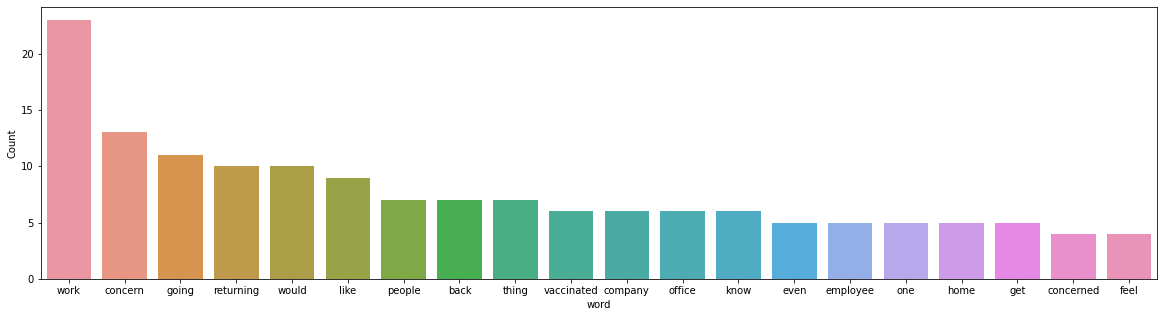

In [10]:
word=freq_words(transcription_list)
word

['like', 'work', 'office', 'know', 'people', 'home', 'going']


(-0.5, 399.5, 199.5, -0.5)

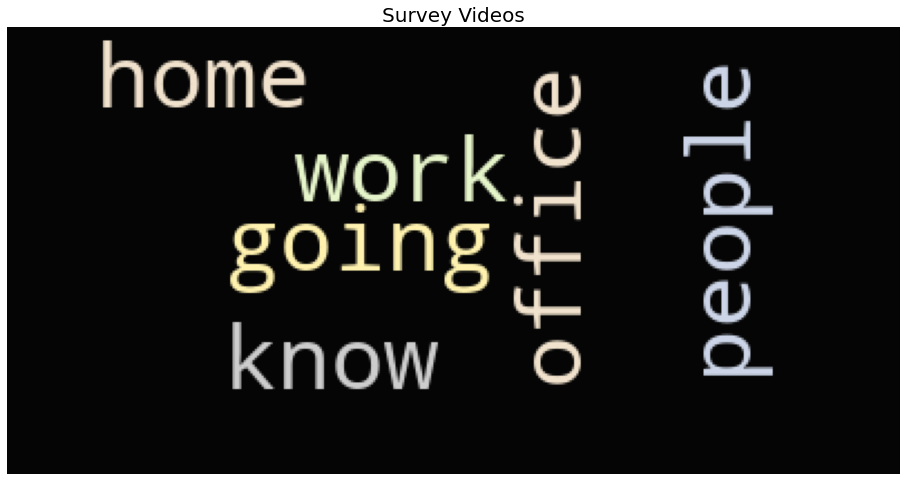

In [26]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 40)

final_text = ''
for transcription in transcription_list:
    final_text+= transcription+"."

final_text = preprocess(final_text)
# print(final_text[1][0])
final_text = final_text[1][0]
hpl = final_text
print(hpl)

wc.generate(" ".join(hpl))
plt.title("Survey Videos", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

In [4]:
def get_sentiments(text):
    blob = TextBlob(text)
    overal_sentiment = blob.sentiment.polarity

    sentences_sentiment = []

    for sentence in blob.sentences:
        sentence_str = str(sentence)
        textblob_sentiment = TextBlob(sentence_str).sentiment.polarity
        obj = {"sentence":sentence_str,"sentiment":textblob_sentiment}
        sentences_sentiment.append(obj)

    return overal_sentiment, sentences_sentiment

from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging
text_analysis_data = {}
def get_allenlp_sentiment(text):
    predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/basic_stanford_sentiment_treebank-2020.06.09.tar.gz")
    text_sentiment_allennpl = predictor.predict(text)
    preds = text_sentiment_allennpl
    print(text_sentiment_allennpl)
    print(preds['probs'][0])
#     print(text_sentiment_allennpl['label'])

    print(f"p(positive)={preds['probs'][0]:.2%}")

    return text_sentiment_allennpl['label'], preds['probs'][0]
    


In [10]:
columns =['Video', 'Sentence', 'AllenNLP_label', 'AllenNLP_Prob', 'Textblob_Sentiment', 'Textblob_score']
allenlp_sentence_sentiment_df = pd.DataFrame(columns= columns)

for idx,text in enumerate(transcription_list,1):
    sentiment, prob = get_allenlp_sentiment(text)
    overal_sentiment_score, sentences_sentiment = get_sentiments(text)
    
    sentences_sentiment = print_text(overal_sentiment_score, sentences_sentiment)
    allenlp_sentence_sentiment_df.loc[len(allenlp_sentence_sentiment_df.index)] = ['Video'+str(idx), text, sentiment, prob, sentences_sentiment, overal_sentiment_score] 
# print(allenlp_sentence_sentiment_df)
allenlp_sentence_sentiment_df.to_csv('allenlp_sentence_sentiment.csv')

[2022-03-03 11:31:00,033] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'For'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,034] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,034] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'whole'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,034] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'time'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,035]

[2022-03-03 11:31:00,047] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'rules'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,048] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,051] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'need'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,051] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,052] [

[2022-03-03 11:31:00,066] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,066] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'vegetable'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,067] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'vendor'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,067] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00

[2022-03-03 11:31:00,076] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'today'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,076] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,077] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,077] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,077] [WA

[2022-03-03 11:31:00,087] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'stay'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,088] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'well'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,088] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,088] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'then'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,089] [

[2022-03-03 11:31:00,111] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,111] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'roaming'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,114] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'around'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,115] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'etc'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,11

[2022-03-03 11:31:00,133] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'visit'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,133] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,134] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'doctor'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,135] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '/'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,136]

[2022-03-03 11:31:00,149] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'spreading'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,149] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,150] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'so'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,150] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,150] 

[2022-03-03 11:31:00,169] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'then'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,170] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'go'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,170] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,171] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'bed'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:00,171] [WA

{'logits': [-0.25047290325164795, 0.1793312132358551], 'probs': [0.3941730856895447, 0.6058268547058105], 'token_ids': [708, 3, 330, 73, 6, 3, 1, 2, 124, 925, 8, 23, 12, 216, 13770, 7, 24, 1, 2286, 4, 19579, 5, 112, 86, 859, 131, 124, 142, 1489, 2, 3, 4690, 5, 114, 12427, 124, 348, 8, 1949, 7, 1430, 1, 106, 1, 2, 124, 240, 16686, 8, 2393, 1, 18, 3, 330, 13101, 5, 28, 3194, 8, 249, 246, 2579, 8, 1, 7, 24, 1, 1003, 3, 1, 1, 8, 256, 2579, 3, 1, 153, 2000, 2, 124, 111, 536, 249, 48, 35, 186, 29, 186, 35, 5, 2393, 216, 12246, 7, 1729, 3, 73, 3, 1, 106, 1, 11364, 878, 2, 124, 37, 140, 3518, 7, 1167, 37, 161, 2249, 6, 1, 2, 172, 124, 41, 256, 36, 44, 176, 5, 83, 79, 108, 1354, 8, 86, 7, 351, 124, 99, 21, 5, 1489, 91, 2, 337, 124, 66, 249, 246, 8, 3, 19047, 1630, 7, 1, 2, 77, 342, 1, 37, 5190, 86, 2, 768, 6, 86, 37, 118, 11, 873, 8, 249, 2579, 18, 8151, 2, 1, 317, 1, 7, 5193, 12, 4, 2000, 2, 124, 249, 2579, 5, 162, 12246, 5, 1, 7, 7588, 79, 132, 37, 954, 42, 41, 4, 1, 2, 110, 182, 249, 48, 8, 

[2022-03-03 11:31:01,746] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'It'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,747] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'has'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,747] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'been'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,747] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'very'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,748] [

[2022-03-03 11:31:01,764] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '-'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,764] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'law'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,764] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,765] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,765] [WARN

[2022-03-03 11:31:01,775] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,776] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'difficult'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,776] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'time'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,776] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,776]

[2022-03-03 11:31:01,784] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,784] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,785] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'able'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,785] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,785] [

[2022-03-03 11:31:01,794] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'some'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,794] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,795] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'know'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,795] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:01,795] [WA

{'logits': [0.1320372223854065, -0.18379387259483337], 'probs': [0.5783079266548157, 0.4216920733451843], 'token_ids': [67, 39, 88, 72, 478, 7, 1167, 240, 7298, 91, 218, 1, 2, 263, 1, 124, 37, 118, 2882, 7, 11259, 327, 2, 58, 666, 12, 216, 16286, 19047, 15, 287, 1633, 186, 12, 186, 6306, 2, 41, 28, 88, 555, 8, 249, 8, 942, 7, 633, 144, 135, 2, 5, 86, 219, 1, 12, 1, 1, 5, 28, 555, 8, 2281, 144, 2, 124, 37, 118, 549, 4, 478, 73, 7, 778, 327, 37, 28, 12, 942, 2, 110, 37, 34, 844, 93, 31, 110, 309, 25, 249, 8, 942, 21, 204, 7, 2170, 37, 592, 13921, 11869, 2, 22, 124, 240, 28, 555, 8, 1203, 6524, 141, 13, 106, 2313, 2, 44, 124, 309, 28, 3630, 92, 6, 144, 8, 942, 21, 204, 7, 1167, 709, 8, 3630, 144, 18, 75, 1, 1, 15, 75, 124, 358, 2, 22, 13, 10, 478, 7, 2170, 37, 2302, 13921, 70, 1429, 307, 12, 9472, 1, 2, 124, 37, 19928, 8, 12751, 3, 327, 246, 8, 942, 7], 'label': '1', 'tokens': ['It', 'has', 'been', 'very', 'difficult', '.', 'We', 'were', 'managing', 'well', 'before', '@@UNKNOWN@@', ',', '

[2022-03-03 11:31:02,971] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,972] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wear'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,972] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'masks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,973] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,974] 

[2022-03-03 11:31:02,988] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,988] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'bath'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,988] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,989] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'use'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:02,989] [WARN

[2022-03-03 11:31:03,000] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:03,001] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Covid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:03,001] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '--'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:03,002] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:03,002] [W

{'logits': [0.20621079206466675, -0.26511073112487793], 'probs': [0.6156964898109436, 0.3843035101890564], 'token_ids': [1167, 2335, 1, 5, 3114, 1, 7, 1, 161, 296, 86, 1, 141, 124, 2692, 5, 373, 3, 9565, 7, 1430, 124, 256, 246, 8, 3, 1184, 2, 124, 12268, 216, 3409, 2, 41, 4, 7215, 2, 724, 1, 5, 337, 1, 3649, 7, 1167, 1949, 3, 1, 1, 14, 64, 14, 124, 309, 12, 3, 1654, 7, 704, 2, 124, 309, 28, 352, 92, 894, 892, 172, 6, 1, 31, 28, 77, 20529, 7], 'label': '1', 'tokens': ['We', 'wear', '@@UNKNOWN@@', 'and', 'carry', '@@UNKNOWN@@', '.', '@@UNKNOWN@@', 'also', 'gives', 'us', '@@UNKNOWN@@', 'when', 'we', 'enter', 'and', 'leave', 'the', 'factory', '.', 'When', 'we', 'come', 'back', 'to', 'the', 'room', ',', 'we', 'wash', 'our', 'clothes', ',', 'have', 'a', 'bath', ',', 'use', '@@UNKNOWN@@', 'and', 'then', '@@UNKNOWN@@', 'dinner', '.', 'We', 'follow', 'the', '@@UNKNOWN@@', '@@UNKNOWN@@', 'as', 'much', 'as', 'we', 'did', 'in', 'the', 'beginning', '.', 'No', ',', 'we', 'did', 'not', 'face', 'any',

[2022-03-03 11:31:04,175] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,176] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,177] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'visiting'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,177] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,177]

[2022-03-03 11:31:04,191] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'March'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,193] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '14'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,193] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,194] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'And'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,194] [WA

[2022-03-03 11:31:04,203] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,203] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'really'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,204] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'step'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,204] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'out'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,204

[2022-03-03 11:31:04,215] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'care'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,216] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,216] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'so'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,216] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'many'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,217] [W

[2022-03-03 11:31:04,228] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'workers'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,229] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'agreed'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,229] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,229] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'stay'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:04,

{'logits': [1.6044917106628418, -1.5665043592453003], 'probs': [0.9597281217575073, 0.04027189314365387], 'token_ids': [63, 106, 1, 3, 19047, 2, 5, 193, 1968, 40, 1, 12, 3, 2717, 27, 3, 405, 7, 63, 2745, 844, 8, 3, 19047, 27, 172, 287, 1, 7817, 2, 5, 63, 12669, 27, 1, 1, 7, 1423, 3, 9565, 14602, 27, 1, 1, 7, 1430, 3, 1, 2634, 2, 437, 1, 131, 11698, 3, 819, 106, 2, 5, 3, 7672, 193, 6672, 44, 64, 7, 1167, 309, 28, 118, 1079, 48, 34, 46, 7, 1167, 240, 783, 13, 13058, 103, 3, 771, 29, 3, 1, 1, 7, 4014, 783, 86, 46, 8, 259, 3235, 3518, 2, 14, 323, 66, 28, 239, 232, 6, 44, 113, 2019, 34, 325, 7, 1167, 161, 14790, 2062, 3235, 11, 79, 92, 35, 6, 86, 299, 13, 2, 337, 13, 66, 452, 6672, 12, 3, 1, 7, 1500, 46, 3, 10951, 13996, 8, 1489, 578, 3, 1, 7], 'label': '1', 'tokens': ['I', 'was', '@@UNKNOWN@@', 'the', 'village', ',', 'and', 'had', 'heard', 'about', '@@UNKNOWN@@', 'in', 'the', 'news', 'on', 'the', 'TV', '.', 'I', 'went', 'home', 'to', 'the', 'village', 'on', 'because', 'my', '@@UNKNOWN@@', 

[2022-03-03 11:31:05,633] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'When'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,634] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,634] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'heard'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,634] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'about'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,635]

[2022-03-03 11:31:05,652] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,653] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,653] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'spreads'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,654] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'via'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,654

[2022-03-03 11:31:05,684] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'increased'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,685] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,685] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'realised'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05,687] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:05

{'logits': [0.533162534236908, -0.5824691653251648], 'probs': [0.7531775236129761, 0.24682243168354034], 'token_ids': [1430, 63, 1968, 40, 13, 171, 2, 63, 193, 60, 301, 83, 13, 106, 7, 1, 2, 63, 19979, 30, 5322, 36, 3, 2717, 5, 132, 317, 209, 11, 26, 142, 2335, 1, 2, 11, 13, 13058, 4033, 3, 771, 5, 1, 1, 31, 44, 63, 5461, 30, 1, 5, 2133, 3947, 1, 7, 16929, 63, 718, 13, 106, 108, 8071, 2, 337, 14, 3, 1194, 6, 16106, 1, 63, 1, 13, 106, 30, 480, 7], 'label': '1', 'tokens': ['When', 'I', 'heard', 'about', 'it', 'first', ',', 'I', 'had', 'no', 'idea', 'what', 'it', 'was', '.', '@@UNKNOWN@@', ',', 'I', 'learnt', 'more', 'information', 'from', 'the', 'news', 'and', 'people', 'around', 'me', 'that', 'you', 'should', 'wear', '@@UNKNOWN@@', ',', 'that', 'it', 'spreads', 'via', 'the', 'air', 'and', '@@UNKNOWN@@', '@@UNKNOWN@@', '--', 'so', 'I', 'became', 'more', '@@UNKNOWN@@', 'and', 'started', 'wearing', '@@UNKNOWN@@', '.', 'Initially', 'I', 'thought', 'it', 'was', 'something', 'normal', ',', 't

[2022-03-03 11:31:06,829] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,829] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,829] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'visiting'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,830] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,830]

[2022-03-03 11:31:06,844] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,844] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,845] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'worked'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,845] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,845] [WA

[2022-03-03 11:31:06,858] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'us'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,860] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,860] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wear'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,861] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'masks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:06,861] [

{'logits': [0.44089362025260925, -0.5062885284423828], 'probs': [0.7205480933189392, 0.279451847076416], 'token_ids': [63, 106, 1, 3, 19047, 12, 1, 18, 287, 8716, 9, 5933, 5, 12669, 8, 1, 317, 10371, 1, 7, 900, 73, 63, 309, 28, 358, 64, 40, 1, 7, 1948, 863, 8, 1, 2, 63, 1279, 18, 4, 165, 734, 5, 337, 1, 2634, 7, 900, 9, 141, 63, 19979, 40, 1, 5, 17, 5019, 7, 1167, 193, 4, 19579, 15, 3, 1, 1, 5, 323, 783, 86, 8, 2335, 1, 5, 724, 1, 7], 'label': '1', 'tokens': ['I', 'was', '@@UNKNOWN@@', 'the', 'village', 'in', '@@UNKNOWN@@', 'for', 'my', 'sister', "'s", 'wedding', 'and', 'returned', 'to', '@@UNKNOWN@@', 'around', '13th', '@@UNKNOWN@@', '.', 'That', 'time', 'I', 'did', 'not', 'know', 'much', 'about', '@@UNKNOWN@@', '.', 'After', 'coming', 'to', '@@UNKNOWN@@', ',', 'I', 'worked', 'for', 'a', 'few', 'days', 'and', 'then', '@@UNKNOWN@@', 'happened', '.', 'That', "'s", 'when', 'I', 'learnt', 'about', '@@UNKNOWN@@', 'and', 'its', 'seriousness', '.', 'We', 'had', 'a', 'meeting', 'with', 'the',

[2022-03-03 11:31:08,125] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,126] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'learnt'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,126] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'about'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,126] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,127] 

[2022-03-03 11:31:08,145] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,146] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,146] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'factory'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,146] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'by'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,147] 

[2022-03-03 11:31:08,162] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wear'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,162] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'masks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,162] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,162] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'regularly'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:08,

{'logits': [1.6162432432174683, -1.5922797918319702], 'probs': [0.9611538052558899, 0.03884624317288399], 'token_ids': [63, 19979, 40, 13, 141, 3, 171, 1, 106, 1, 7, 1, 106, 14602, 18, 1, 4984, 14, 1, 13058, 103, 10323, 2, 5, 86, 1, 12, 3, 1, 7, 32, 19579, 106, 2286, 12, 3, 9565, 29, 132, 36, 1, 5, 1, 2, 5, 110, 1, 40, 83, 1, 106, 7, 2170, 11482, 40, 131, 3, 1, 6, 1, 16106, 240, 17302, 12, 1, 2, 5, 8, 2335, 1, 2, 1, 1, 74, 2111, 2, 2466, 512, 1, 36, 126, 132, 5, 1001, 205, 770, 5, 1398, 8, 132, 7], 'label': '1', 'tokens': ['I', 'learnt', 'about', 'it', 'when', 'the', 'first', '@@UNKNOWN@@', 'was', '@@UNKNOWN@@', '.', '@@UNKNOWN@@', 'was', 'closed', 'for', '@@UNKNOWN@@', 'months', 'as', '@@UNKNOWN@@', 'spreads', 'through', 'contact', ',', 'and', 'us', '@@UNKNOWN@@', 'in', 'the', '@@UNKNOWN@@', '.', 'A', 'meeting', 'was', 'held', 'in', 'the', 'factory', 'by', 'people', 'from', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', ',', 'and', 'they', '@@UNKNOWN@@', 'about', 'what', '@@UNKNOWN@@', 'was', '

[2022-03-03 11:31:09,303] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,303] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'actually'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,304] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'got'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,304] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,304] [

[2022-03-03 11:31:09,324] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'hospital'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,325] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '&'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,325] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'took'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,326] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,326] 

[2022-03-03 11:31:09,341] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,342] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'also'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,342] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,342] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'me'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,343] [

[2022-03-03 11:31:09,357] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'away'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,358] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,358] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,358] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,358] [W

[2022-03-03 11:31:09,367] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,367] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,367] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'ready'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,368] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:09,368] [WA

{'logits': [-0.11058466881513596, 0.09001211822032928], 'probs': [0.4500183165073395, 0.5499817132949829], 'token_ids': [63, 294, 711, 4, 1, 656, 1, 7, 63, 193, 4, 5657, 85, 1, 287, 13299, 5, 3185, 209, 1, 7, 67, 3069, 209, 944, 734, 8, 162, 104, 31, 63, 2745, 8, 3, 15300, 1373, 3069, 4, 2389, 2514, 8, 1600, 287, 1, 7, 63, 106, 192, 11809, 7, 668, 63, 2596, 63, 309, 28, 41, 1, 1, 43, 1, 2, 1, 2, 1, 7, 24, 1, 106, 161, 15, 209, 2, 5, 791, 209, 28, 8, 3909, 2, 44, 11, 3458, 7, 778, 2390, 5, 4642, 240, 72, 11809, 40, 83, 2634, 8, 209, 2, 172, 63, 106, 44, 176, 302, 2, 5, 110, 120, 25, 256, 8, 2281, 1, 239, 232, 6, 209, 7, 778, 1746, 294, 3458, 1, 4, 6273, 1970, 18, 209, 8, 2378, 2, 141, 19665, 240, 1, 7, 1423, 63, 106, 3394, 8, 2378, 7], 'label': '0', 'tokens': ['I', 'actually', 'got', 'a', '@@UNKNOWN@@', 'during', '@@UNKNOWN@@', '.', 'I', 'had', 'a', 'drink', 'which', '@@UNKNOWN@@', 'my', 'acidity', 'and', 'gave', 'me', '@@UNKNOWN@@', '.', 'It', 'took', 'me', '10', 'days', 'to', 'get', '

[2022-03-03 11:31:10,515] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,516] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,517] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'visiting'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,517] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'our'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,51

[2022-03-03 11:31:10,533] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,533] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'came'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,534] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,534] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'visit'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,534] [

[2022-03-03 11:31:10,548] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,549] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Tamil'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,549] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Nadu'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,549] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'even'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:10,550]

{'logits': [-0.8888099193572998, 0.8896673917770386], 'probs': [0.1444912552833557, 0.8555087447166443], 'token_ids': [1167, 240, 1, 216, 327, 12, 216, 19047, 34, 3, 73, 3, 1, 106, 1, 7, 1167, 193, 1968, 40, 1, 2, 22, 11, 106, 28, 304, 124, 193, 256, 8, 3, 19047, 2, 124, 2238, 8, 2281, 216, 327, 7, 1167, 240, 555, 8, 2378, 8, 1, 93, 263, 3, 1, 106, 12046, 317, 1, 7, 5887, 106, 19564, 185, 6011, 2, 63, 120, 28, 162, 94, 12, 1, 1, 77, 79, 63, 1670, 8, 7], 'label': '0', 'tokens': ['We', 'were', '@@UNKNOWN@@', 'our', 'children', 'in', 'our', 'village', 'at', 'the', 'time', 'the', '@@UNKNOWN@@', 'was', '@@UNKNOWN@@', '.', 'We', 'had', 'heard', 'about', '@@UNKNOWN@@', ',', 'but', 'that', 'was', 'not', 'why', 'we', 'had', 'come', 'to', 'the', 'village', ',', 'we', 'came', 'to', 'visit', 'our', 'children', '.', 'We', 'were', 'able', 'to', 'return', 'to', '@@UNKNOWN@@', 'only', 'after', 'the', '@@UNKNOWN@@', 'was', 'lifted', 'around', '@@UNKNOWN@@', '.', 'Everything', 'was', 'locked', 'down', '

[2022-03-03 11:31:11,946] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Even'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,947] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'if'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,947] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,948] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'went'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,948] [WA

[2022-03-03 11:31:11,959] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'faced'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,959] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,959] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'same'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,959] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'problem'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,

[2022-03-03 11:31:11,972] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,972] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'here'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,973] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,973] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'take'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:11,973] [W

{'logits': [1.8734952211380005, -1.8443920612335205], 'probs': [0.9762905836105347, 0.023709431290626526], 'token_ids': [1018, 79, 63, 2745, 246, 8, 3, 19047, 2, 63, 120, 41, 711, 1, 135, 7, 1500, 6031, 219, 106, 320, 7, 351, 63, 193, 14171, 246, 12, 3, 19047, 2, 63, 120, 41, 6209, 3, 267, 504, 7, 63, 469, 11, 6379, 317, 287, 19047, 43, 1, 5, 1, 161, 193, 17302, 1194, 6, 1, 16106, 7, 63, 827, 3518, 219, 12, 3, 1, 31, 3, 1, 10, 219, 8, 239, 232, 6, 86, 7, 4014, 697, 4783, 791, 86, 8, 23, 3518, 5, 2466, 512, 1, 7], 'label': '1', 'tokens': ['Even', 'if', 'I', 'went', 'back', 'to', 'the', 'village', ',', 'I', 'could', 'have', 'got', '@@UNKNOWN@@', 'there', '.', 'So', 'staying', 'here', 'was', 'fine', '.', 'If', 'I', 'had', 'stayed', 'back', 'in', 'the', 'village', ',', 'I', 'could', 'have', 'faced', 'the', 'same', 'problem', '.', 'I', 'head', 'that', 'areas', 'around', 'my', 'village', 'like', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', 'also', 'had', 'increasing', 'number', 'of', '@@UNKNOWN@@', 

[2022-03-03 11:31:13,099] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'No'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,099] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'one'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,100] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'from'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,100] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,100] [W

[2022-03-03 11:31:13,117] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'villages'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,117] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '/'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,117] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'towns'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,118] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,118]

[2022-03-03 11:31:13,130] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,130] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'many'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,130] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'people'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,131] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:13,131]

{'logits': [1.6297366619110107, -1.6099289655685425], 'probs': [0.9623000025749207, 0.037700023502111435], 'token_ids': [704, 35, 36, 3, 1, 118, 2745, 844, 7, 24, 1, 1, 1, 11, 3, 1, 6, 1, 16106, 12, 1, 10, 363, 2, 22, 431, 10, 45, 1, 3518, 1, 12, 216, 844, 1, 1, 1, 7, 1167, 240, 783, 124, 70, 23, 3518, 12, 3, 1, 2, 22, 79, 124, 2950, 844, 337, 124, 41, 8, 724, 1, 43, 6419, 18785, 5, 70, 256, 56, 10323, 15, 113, 132, 2, 5, 182, 162, 1, 11, 80, 7, 1500, 2, 124, 37, 3518, 4353, 12, 1, 2, 5, 124, 14171, 246, 7], 'label': '1', 'tokens': ['No', 'one', 'from', 'the', '@@UNKNOWN@@', 'really', 'went', 'home', '.', 'The', '@@UNKNOWN@@', '@@UNKNOWN@@', '@@UNKNOWN@@', 'that', 'the', '@@UNKNOWN@@', 'of', '@@UNKNOWN@@', 'cases', 'in', '@@UNKNOWN@@', 'is', 'high', ',', 'but', 'everything', 'is', 'good', '@@UNKNOWN@@', 'safe', '@@UNKNOWN@@', 'in', 'our', 'home', '@@UNKNOWN@@', '@@UNKNOWN@@', '@@UNKNOWN@@', '.', 'We', 'were', 'told', 'we', 'will', 'be', 'safe', 'in', 'the', '@@UNKNOWN@@', ',', 'but', '

[2022-03-03 11:31:14,617] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'But'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,617] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'then'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'realised'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,619

[2022-03-03 11:31:14,632] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,632] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'come'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,633] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'here'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,633] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,634] [WA

[2022-03-03 11:31:14,646] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,647] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,647] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,647] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'also'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,647] [WARN

[2022-03-03 11:31:14,657] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,657] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'village'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,657] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,658] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'everyone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,

[2022-03-03 11:31:14,665] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'station'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,665] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'or'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,666] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'bus'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,666] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'station'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,

[2022-03-03 11:31:14,674] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,674] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'family'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,675] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'back'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,675] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'home'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:14,675

{'logits': [0.1990247368812561, -0.24386358261108398], 'probs': [0.6089470386505127, 0.3910529315471649], 'token_ids': [668, 337, 63, 1, 11, 79, 63, 249, 246, 2, 63, 70, 28, 23, 2944, 287, 1, 2, 44, 63, 1927, 2267, 8, 1489, 246, 2, 5, 1, 287, 1970, 7, 778, 5324, 1670, 8, 256, 219, 2, 22, 63, 41, 93, 35, 5324, 5, 79, 95, 187, 219, 95, 70, 4683, 38, 598, 7, 63, 16686, 288, 8, 1489, 15, 287, 1633, 5, 239, 232, 6, 117, 2, 14, 124, 161, 348, 11, 1019, 7, 778, 1633, 5, 4642, 1670, 209, 8, 256, 246, 7, 668, 63, 182, 41, 1, 1, 195, 1, 246, 7, 1423, 141, 63, 249, 246, 8, 3, 19047, 2, 437, 58, 63, 358, 111, 322, 8, 256, 121, 79, 63, 4725, 12836, 2, 5, 58, 688, 83, 120, 6672, 7, 1423, 58, 70, 23, 555, 8, 256, 8, 3, 1, 4179, 42, 17457, 4179, 8, 256, 2259, 209, 59, 2, 656, 236, 251, 380, 1763, 278, 246, 2, 63, 111, 637, 892, 2, 44, 63, 4237, 63, 111, 1489, 219, 210, 2, 5, 783, 287, 175, 246, 844, 8, 1489, 3518, 7], 'label': '1', 'tokens': ['But', 'then', 'I', '@@UNKNOWN@@', 'that', 'if', 'I', 'go',

[2022-03-03 11:31:15,772] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'None'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:15,773] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:15,774] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:15,775] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'peers'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:15,775] [

{'logits': [-1.516970157623291, 1.5379518270492554], 'probs': [0.045005444437265396, 0.9549945592880249], 'token_ids': [3149, 6, 287, 1, 1, 1746, 36, 3, 1, 2745, 844, 518, 7], 'label': '0', 'tokens': ['None', 'of', 'my', '@@UNKNOWN@@', '@@UNKNOWN@@', 'friends', 'from', 'the', '@@UNKNOWN@@', 'went', 'home', 'either', '.']}
0.045005444437265396
p(positive)=4.50%
Overal Sentiment =  Neutral
None of my peers/friends from the hostel went home either.

[2022-03-03 11:31:17,068] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:17,069] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'took'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:17,069] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'some'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:17,070] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '10'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:17,070] [WA

{'logits': [-1.1426503658294678, 1.1761138439178467], 'probs': [0.08958079665899277, 0.910419225692749], 'token_ids': [63, 3069, 75, 944, 186, 14030, 734, 109, 8, 145, 494, 104, 218, 12591, 8, 3, 9565, 7], 'label': '0', 'tokens': ['I', 'took', 'some', '10', '-', '12', 'days', 'off', 'to', 'feel', 'completely', 'better', 'before', 'returning', 'to', 'the', 'factory', '.']}
0.08958079665899277
p(positive)=8.96%
Overal Sentiment =  Positive
I took some 10-12 days off to feel completely better before returning to the factory.

[2022-03-03 11:31:18,297] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'It'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,297] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,298] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'very'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,298] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'difficult'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,2

[2022-03-03 11:31:18,311] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'like'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,311] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'someone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,312] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'has'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,313] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'tied'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,3

[2022-03-03 11:31:18,324] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n't'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,324] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,324] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'home'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,324] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'all'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,325] [W

[2022-03-03 11:31:18,333] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'at'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,333] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'entry'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,333] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,334] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'exit'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:18,334] 

{'logits': [0.05345388501882553, -0.08981935679912567], 'probs': [0.5357571840286255, 0.4642428755760193], 'token_ids': [67, 106, 72, 478, 8, 2222, 12, 1, 7, 1430, 26, 249, 8, 94, 8548, 4213, 5, 337, 256, 844, 2, 26, 145, 45, 7, 1, 2, 140, 844, 46, 3, 73, 26, 145, 43, 902, 39, 9280, 26, 59, 42, 1, 26, 7, 63, 827, 72, 1, 13, 106, 72, 478, 7, 67, 9, 558, 8, 256, 844, 263, 4, 684, 9, 94, 2, 22, 63, 243, 25, 23, 844, 46, 3, 73, 7, 63, 106, 28, 2249, 8, 2378, 8, 3, 9565, 172, 110, 3069, 1, 18, 216, 1, 31, 4336, 512, 1, 2, 5644, 12, 1267, 2, 2377, 1, 34, 3209, 5, 3172, 984, 7, 67, 9, 60, 504, 2, 63, 145, 13, 10, 3518, 12, 3, 9565, 7, 271, 9, 28, 113, 598, 1, 5603, 12, 287, 19047, 7], 'label': '1', 'tokens': ['It', 'was', 'very', 'difficult', 'to', 'remain', 'in', '@@UNKNOWN@@', '.', 'When', 'you', 'go', 'to', 'work', 'freely', 'everyday', 'and', 'then', 'come', 'home', ',', 'you', 'feel', 'good', '.', '@@UNKNOWN@@', ',', 'being', 'home', 'all', 'the', 'time', 'you', 'feel', 'like', 'someone'

[2022-03-03 11:31:19,728] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Yes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:19,729] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:19,730] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:19,730] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ''s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:19,731] [WARNI

{'logits': [-0.2669297158718109, 0.25309133529663086], 'probs': [0.372847318649292, 0.6271527409553528], 'token_ids': [4036, 2, 13, 9, 93, 1016, 8, 145, 12370, 141, 26, 3198, 3, 1194, 6, 16106, 17302, 7], 'label': '0', 'tokens': ['Yes', ',', 'it', "'s", 'only', 'natural', 'to', 'feel', 'scared', 'when', 'you', 'hear', 'the', 'number', 'of', 'cases', 'increasing', '.']}
0.372847318649292
p(positive)=37.28%
Overal Sentiment =  Neutral
Yes, it's only natural to feel scared when you hear the number of cases increasing.

[2022-03-03 11:31:21,072] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,073] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'did'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,073] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,074] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,074] [WA

[2022-03-03 11:31:21,085] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,086] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'manage'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,086] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,087] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'The'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:21,087] [W

{'logits': [0.24766042828559875, -0.3050706386566162], 'probs': [0.6347689628601074, 0.3652310073375702], 'token_ids': [63, 309, 28, 41, 92, 2177, 14, 148, 7, 7900, 10, 1800, 31, 13, 9, 28, 1800, 8, 209, 961, 7, 271, 37, 1, 186, 1, 2019, 46, 18686, 21, 1564, 295, 5, 395, 8, 2191, 7, 24, 1449, 3185, 86, 1, 2, 37, 6478, 216, 1, 4213, 218, 15668, 3, 9565, 5, 124, 2335, 1, 46, 3, 73, 7, 160, 6072, 3, 1750, 7], 'label': '1', 'tokens': ['I', 'did', 'not', 'have', 'any', 'fears', 'as', 'such', '.', 'Whatever', 'is', 'happening', '--', 'it', "'s", 'not', 'happening', 'to', 'me', 'alone', '.', 'There', 'are', '@@UNKNOWN@@', '-', '@@UNKNOWN@@', 'girls', 'all', 'experiencing', 'this', 'event', 'together', 'and', 'trying', 'to', 'manage', '.', 'The', 'company', 'gave', 'us', '@@UNKNOWN@@', ',', 'are', 'checking', 'our', '@@UNKNOWN@@', 'everyday', 'before', 'entering', 'the', 'factory', 'and', 'we', 'wear', '@@UNKNOWN@@', 'all', 'the', 'time', '.', 'This', 'reduces', 'the', 'fear', '.']}
0.63476896

[2022-03-03 11:31:22,533] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'In'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,533] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,533] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'beginning'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,534] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,534]

[2022-03-03 11:31:22,547] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'maintain'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,547] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'our'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,548] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'homes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22,548] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'only'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:22

{'logits': [0.6195092797279358, -0.6712336540222168], 'probs': [0.7842729091644287, 0.21572710573673248], 'token_ids': [547, 3, 1654, 2, 3, 175, 783, 86, 28, 8, 249, 246, 2313, 8, 1, 7, 668, 13, 106, 642, 478, 8, 2191, 2, 371, 15, 3, 311, 31, 124, 70, 23, 555, 8, 2466, 216, 6459, 93, 79, 124, 94, 7, 1500, 124, 2745, 246, 8, 94, 7], 'label': '1', 'tokens': ['In', 'the', 'beginning', ',', 'the', 'family', 'told', 'us', 'not', 'to', 'go', 'back', 'due', 'to', '@@UNKNOWN@@', '.', 'But', 'it', 'was', 'getting', 'difficult', 'to', 'manage', ',', 'especially', 'with', 'the', 'kids', '--', 'we', 'will', 'be', 'able', 'to', 'maintain', 'our', 'homes', 'only', 'if', 'we', 'work', '.', 'So', 'we', 'went', 'back', 'to', 'work', '.']}
0.7842729091644287
p(positive)=78.43%
Overal Sentiment =  Neutral
In the beginning, the family told us not to go back due to Covid.But it was getting difficult to manage, especially with the kids--we will be able to maintain our homes only if we work.So we went back t

[2022-03-03 11:31:23,603] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Yes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,604] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,605] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'when'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,605] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,605] [WAR

[2022-03-03 11:31:23,619] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,619] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'take'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,620] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'back'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,622] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Covid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,623]

[2022-03-03 11:31:23,632] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'realised'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,632] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,633] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'danger'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23,633] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:23

{'logits': [1.1125624179840088, -1.1088902950286865], 'probs': [0.9021594524383545, 0.09784050285816193], 'token_ids': [4036, 2, 141, 287, 175, 1968, 3, 1194, 6, 16106, 37, 17302, 12, 3, 2382, 110, 1670, 209, 8, 256, 246, 7, 24, 1, 5, 1, 9, 36, 1, 783, 86, 304, 124, 322, 8, 239, 246, 1, 8, 3, 1, 2, 44, 63, 1927, 287, 789, 11, 63, 70, 256, 246, 141, 431, 392, 104, 7, 1430, 110, 987, 3, 1769, 1, 317, 144, 2, 337, 110, 1, 3, 3750, 5, 13996, 7], 'label': '1', 'tokens': ['Yes', ',', 'when', 'my', 'family', 'heard', 'the', 'number', 'of', 'cases', 'are', 'increasing', 'in', 'the', 'city', 'they', 'wanted', 'me', 'to', 'come', 'back', '.', 'The', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', "'s", 'from', '@@UNKNOWN@@', 'told', 'us', 'why', 'we', 'want', 'to', 'take', 'back', '@@UNKNOWN@@', 'to', 'the', '@@UNKNOWN@@', ',', 'so', 'I', 'convinced', 'my', 'parents', 'that', 'I', 'will', 'come', 'back', 'when', 'everything', 'becomes', 'better', '.', 'When', 'they', 'saw', 'the', 'condition', '@@UNKNOWN@@

[2022-03-03 11:31:25,052] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,052] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'explained'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,053] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,053] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'them'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,054

[2022-03-03 11:31:25,068] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'them'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,069] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'understand'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,069] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:25,070] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'this'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:

{'logits': [0.7103628516197205, -0.7246184349060059], 'probs': [0.8076762557029724, 0.1923237144947052], 'token_ids': [63, 1, 8, 144, 131, 3, 1194, 6, 16106, 12, 1, 106, 192, 363, 2, 5, 79, 63, 2378, 844, 5, 256, 12, 10323, 15, 144, 337, 13, 1, 76, 7206, 7, 63, 112, 144, 859, 11, 21, 10, 28, 3518, 2, 5, 63, 70, 256, 844, 141, 3, 819, 10, 104, 12, 1, 7, 63, 41, 25, 740, 246, 844, 391, 3, 1654, 6, 3, 1], 'label': '1', 'tokens': ['I', '@@UNKNOWN@@', 'to', 'them', 'how', 'the', 'number', 'of', 'cases', 'in', '@@UNKNOWN@@', 'was', 'quite', 'high', ',', 'and', 'if', 'I', 'return', 'home', 'and', 'come', 'in', 'contact', 'with', 'them', 'then', 'it', '@@UNKNOWN@@', 'their', 'risk', '.', 'I', 'made', 'them', 'understand', 'that', 'this', 'is', 'not', 'safe', ',', 'and', 'I', 'will', 'come', 'home', 'when', 'the', 'situation', 'is', 'better', 'in', '@@UNKNOWN@@', '.', 'I', 'have', "n't", 'gone', 'back', 'home', 'since', 'the', 'beginning', 'of', 'the', '@@UNKNOWN@@']}
0.8076762557029724
p(posit

[2022-03-03 11:31:26,203] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'None'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:26,204] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:26,205] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:26,206] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'workers'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:26,206

{'logits': [-0.8856961727142334, 0.9215983748435974], 'probs': [0.14096541702747345, 0.859034538269043], 'token_ids': [3149, 6, 3, 10951, 2745, 844, 7, 648, 3, 18785, 193, 5155, 7, 8146, 106, 12370, 2, 5, 4237, 8, 1489, 246, 7], 'label': '0', 'tokens': ['None', 'of', 'the', 'workers', 'went', 'home', '.', 'All', 'the', 'trains', 'had', 'stopped', '.', 'Everyone', 'was', 'scared', ',', 'and', 'decided', 'to', 'stay', 'back', '.']}
0.14096541702747345
p(positive)=14.10%
Overal Sentiment =  Neutral
None of the workers went home.All the trains had stopped.Everyone was scared, and decided to stay back.

[2022-03-03 11:31:27,714] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Most'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,715] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'workers'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,715] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'returned'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,715] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27

[2022-03-03 11:31:27,727] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,727] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,728] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'fear'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,728] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:27,728] [WAR

[2022-03-03 11:31:27,739] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [0.3121902644634247, -0.3491389751434326], 'probs': [0.659558892250061, 0.3404410779476166], 'token_ids': [4271, 10951, 12669, 7, 351, 75, 309, 25, 2, 337, 13, 106, 367, 2313, 8, 4107, 1, 31, 1120, 110, 193, 892, 34, 844, 2, 42, 76, 175, 309, 28, 2939, 13, 7, 1, 2, 3, 1750, 6, 1, 39, 3851, 2, 4073, 7, 10248, 41, 206, 3, 1, 39, 12046, 2, 5, 132, 37, 205, 317, 30, 8548, 2, 44, 11, 101, 144, 188, 8993, 6, 1, 7], 'label': '1', 'tokens': ['Most', 'workers', 'returned', '.', 'If', 'some', 'did', "n't", ',', 'then', 'it', 'was', 'probably', 'due', 'to', 'individual', '@@UNKNOWN@@', '--', 'maybe', 'they', 'had', 'problems', 'at', 'home', ',', 'or', 'their', 'family', 'did', 'not', 'allow', 'it', '.', '@@UNKNOWN@@', ',', 'the', 'fear', 'of', '@@UNKNOWN@@', 'has', 'reduced', ',', 'anyway', '.', 'People', 'have', 'seen', 'the', '@@UNKNOWN@@', 'has', 'lifted', ',', 'and', 'people', 'are', 'moving', 'around', 'more', 'freely', ',', 'so', 'that', 'makes', 'them', 'less', 'fearful', 'of', 

[2022-03-03 11:31:28,860] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'However'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:28,861] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'people'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:28,862] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'who'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:28,862] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'come'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:28

{'logits': [-0.31532981991767883, 0.2705334424972534], 'probs': [0.35758456587791443, 0.6424154043197632], 'token_ids': [6838, 132, 58, 256, 36, 72, 176, 2, 43, 1, 1, 99, 25, 256, 8, 94, 7484, 7], 'label': '0', 'tokens': ['However', 'people', 'who', 'come', 'from', 'very', 'far', ',', 'like', '@@UNKNOWN@@', '@@UNKNOWN@@', 'do', "n't", 'come', 'to', 'work', 'anymore', '.']}
0.35758456587791443
p(positive)=35.76%
Overal Sentiment =  Neutral
However people who come from very far, like Tamil Nadu don't come to work anymore.

[2022-03-03 11:31:30,180] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Supervisors'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,181] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'would'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,181] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'come'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,181] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'periodically'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03

[2022-03-03 11:31:30,194] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,195] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,195] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'there'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,195] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,196

[2022-03-03 11:31:30,207] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,208] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n't'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,208] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'worry'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,208] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,209] [WA

[2022-03-03 11:31:30,217] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,217] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,217] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ''m'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,217] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:30,218] [WARNIN

{'logits': [-0.41168710589408875, 0.3731101155281067], 'probs': [0.3132868707180023, 0.6867130398750305], 'token_ids': [1, 111, 256, 1, 8, 3, 1, 7, 15447, 124, 240, 28, 278, 2579, 2, 110, 2238, 5, 1, 1, 5, 1, 7, 2170, 16686, 8, 23, 3518, 2, 5, 28, 23, 3471, 5, 110, 240, 135, 18, 86, 2, 5, 111, 239, 232, 6, 86, 7, 2170, 783, 86, 8, 23, 284, 5, 228, 1146, 8, 216, 789, 2, 11, 124, 240, 3518, 219, 44, 11, 110, 99, 25, 3909, 7, 24, 18956, 36, 3, 9565, 2238, 5, 1, 86, 2, 5, 63, 70, 28, 23, 555, 8, 1049, 11, 7, 2170, 3069, 232, 6, 86, 43, 124, 240, 76, 311, 2, 63, 552, 28, 514, 77, 287, 789, 182, 239, 232, 6, 86, 43, 11, 31, 110, 3185, 86, 1019, 44, 124, 193, 1931, 8, 2510, 5, 3409, 8, 2335, 7], 'label': '0', 'tokens': ['@@UNKNOWN@@', 'would', 'come', '@@UNKNOWN@@', 'to', 'the', '@@UNKNOWN@@', '.', 'Since', 'we', 'were', 'not', 'going', 'outside', ',', 'they', 'came', 'and', '@@UNKNOWN@@', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', '.', 'They', 'asked', 'to', 'be', 'safe', ',', 'and', 'not', 'be', 

[2022-03-03 11:31:31,507] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:31,508] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'saw'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:31,508] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:31,508] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:31,509] [WAR

{'logits': [-0.6005050539970398, 0.6233135461807251], 'probs': [0.2272651642560959, 0.7727348804473877], 'token_ids': [1167, 987, 27, 3, 405, 11, 1, 240, 1, 7, 63, 711, 4, 521, 27, 287, 4839, 11, 3, 1449, 106, 1, 2, 5, 11, 9, 131, 63, 4237, 8, 249, 246, 7], 'label': '0', 'tokens': ['We', 'saw', 'on', 'the', 'TV', 'that', '@@UNKNOWN@@', 'were', '@@UNKNOWN@@', '.', 'I', 'got', 'a', 'message', 'on', 'my', 'phone', 'that', 'the', 'company', 'was', '@@UNKNOWN@@', ',', 'and', 'that', "'s", 'how', 'I', 'decided', 'to', 'go', 'back', '.']}
0.2272651642560959
p(positive)=22.73%
Overal Sentiment =  Neutral
We saw on the TV that companies were reopening.I got a message on my phone that the company was reopening, and that's how I decided to go back.

[2022-03-03 11:31:32,721] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'The'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,721] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'sir'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,722] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'from'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,722] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,722] [

[2022-03-03 11:31:32,744] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,745] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'resume'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,745] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'duty'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:32,745] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [1.7091054916381836, -1.6771728992462158], 'probs': [0.967272937297821, 0.032727062702178955], 'token_ids': [24, 1, 36, 3, 1449, 2238, 8, 3, 1, 7, 2045, 783, 86, 40, 3, 1, 5, 8, 1489, 578, 2, 2335, 1, 5, 724, 1, 1, 2, 5, 8, 8182, 236, 7847, 141, 124, 13000, 3098, 7], 'label': '1', 'tokens': ['The', '@@UNKNOWN@@', 'from', 'the', 'company', 'came', 'to', 'the', '@@UNKNOWN@@', '.', 'He', 'told', 'us', 'about', 'the', '@@UNKNOWN@@', 'and', 'to', 'stay', 'inside', ',', 'wear', '@@UNKNOWN@@', 'and', 'use', '@@UNKNOWN@@', '@@UNKNOWN@@', ',', 'and', 'to', 'continue', 'these', 'practices', 'when', 'we', 'resume', 'duty', '.']}
0.967272937297821
p(positive)=96.73%
Overal Sentiment =  Neutral
The sir from the company came to the hostel.He told us about the lockdown and to stay inside, wear masks and use sanitisers regularly, and to continue these practices when we resume duty.

[2022-03-03 11:31:33,962] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'The'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33,963] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lockdown'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33,963] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lasted'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33,964] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33

[2022-03-03 11:31:33,977] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33,979] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'maintain'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33,979] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'social'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:33,979] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'distancing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:

[2022-03-03 11:31:34,003] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:34,004] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'would'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:34,004] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'take'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:34,004] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'around'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:34,00

{'logits': [0.5440976023674011, -0.5939354300498962], 'probs': [0.7573183178901672, 0.24268169701099396], 'token_ids': [24, 1, 1, 18, 4590, 734, 7, 1, 5, 1, 1, 36, 1, 1, 3, 1, 5, 2286, 4668, 40, 1, 1, 8, 23, 730, 31, 2335, 1, 34, 46, 251, 2, 724, 1, 2, 2466, 512, 1, 5358, 683, 5, 1001, 278, 52, 770, 8, 132, 195, 2451, 7, 1, 1, 309, 28, 2939, 86, 8, 1079, 2579, 34, 46, 656, 21, 694, 7, 1, 783, 86, 13, 111, 239, 317, 1, 4984, 18, 3, 9565, 8, 17884, 186, 1429, 7], 'label': '1', 'tokens': ['The', '@@UNKNOWN@@', '@@UNKNOWN@@', 'for', '40', 'days', '.', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', '@@UNKNOWN@@', 'from', '@@UNKNOWN@@', '@@UNKNOWN@@', 'the', '@@UNKNOWN@@', 'and', 'held', 'sessions', 'about', '@@UNKNOWN@@', '@@UNKNOWN@@', 'to', 'be', 'taken', '--', 'wear', '@@UNKNOWN@@', 'at', 'all', 'times', ',', 'use', '@@UNKNOWN@@', ',', 'maintain', 'social', '@@UNKNOWN@@', 'whenever', 'possible', 'and', 'avoid', 'going', 'too', 'close', 'to', 'people', 'while', 'speaking', '.', '@@UNKNOWN@@', '@@UN

[2022-03-03 11:31:35,293] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,294] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'got'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,294] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'masks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,295] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,295] [

[2022-03-03 11:31:35,306] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,306] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,307] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'can'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,307] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'get'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,307] [WARN

[2022-03-03 11:31:35,316] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'when'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,317] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,317] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'go'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,317] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'down'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:35,318] [W

{'logits': [-0.9661516547203064, 0.9709967374801636], 'probs': [0.12596148252487183, 0.8740385174751282], 'token_ids': [1167, 711, 1, 5, 1, 1, 7, 9848, 124, 2393, 216, 105, 1, 2, 42, 79, 902, 39, 73, 110, 15080, 1, 4, 18943, 48, 6, 3341, 3106, 7, 67, 9, 28, 52, 11456, 7, 1167, 66, 162, 4, 18943, 18, 1623, 1, 2, 5, 124, 724, 1206, 186, 3199, 1, 18, 3199, 186, 6226, 4984, 7, 1167, 66, 4121, 144, 452, 7, 1167, 2335, 1, 12, 1, 141, 124, 249, 185, 8, 5657, 2135, 42, 8, 2510, 7, 735, 12, 3, 1184, 2, 124, 99, 25, 2335, 4, 18943, 7], 'label': '0', 'tokens': ['We', 'got', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', '@@UNKNOWN@@', '.', 'Now', 'we', 'buy', 'our', 'own', '@@UNKNOWN@@', ',', 'or', 'if', 'someone', 'has', 'time', 'they', 'stitch', '@@UNKNOWN@@', 'a', 'mask', 'out', 'of', 'extra', 'fabric', '.', 'It', "'s", 'not', 'too', 'expensive', '.', 'We', 'can', 'get', 'a', 'mask', 'for', '20', '@@UNKNOWN@@', ',', 'and', 'we', 'use', '2', '-', '3', '@@UNKNOWN@@', 'for', '3', '-', '4', 'months', '.', '

[2022-03-03 11:31:36,536] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'They'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,537] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'give'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,537] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'masks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,537] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,538] 

[2022-03-03 11:31:36,553] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Covid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,553] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,553] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'avoid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,554] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dust'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:36,554

{'logits': [0.6178690195083618, -0.6586735844612122], 'probs': [0.7818606495857239, 0.21813929080963135], 'token_ids': [2170, 228, 1, 2, 1, 2, 1, 7, 1, 10, 5603, 12, 3, 1, 7, 1167, 162, 2314, 2135, 8, 5657, 7, 17095, 10951, 240, 458, 3947, 1, 1373, 1, 195, 804, 16438, 186, 1, 8, 1001, 5338, 7, 1167, 37, 1278, 8, 2393, 216, 105, 1, 7], 'label': '1', 'tokens': ['They', 'give', '@@UNKNOWN@@', ',', '@@UNKNOWN@@', ',', '@@UNKNOWN@@', '.', '@@UNKNOWN@@', 'is', 'available', 'in', 'the', '@@UNKNOWN@@', '.', 'We', 'get', 'hot', 'water', 'to', 'drink', '.', 'Certain', 'workers', 'were', 'already', 'wearing', '@@UNKNOWN@@', '&', '@@UNKNOWN@@', 'while', 'working', 'pre', '-', '@@UNKNOWN@@', 'to', 'avoid', 'dust', '.', 'We', 'are', 'expected', 'to', 'buy', 'our', 'own', '@@UNKNOWN@@', '.']}
0.7818606495857239
p(positive)=78.19%
Overal Sentiment =  Positive
They give masks, gloves, sanitisers.Soap is available in the washroom.We get hot water to drink.Certain workers were already wearing masks & cap

[2022-03-03 11:31:37,960] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:37,961] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:37,961] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'given'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:37,961] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'masks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:37,962

{'logits': [0.11985646188259125, -0.12656304240226746], 'probs': [0.5612950325012207, 0.4387049973011017], 'token_ids': [1167, 240, 714, 1, 5, 1, 7], 'label': '1', 'tokens': ['We', 'were', 'given', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', '.']}
0.5612950325012207
p(positive)=56.13%
Overal Sentiment =  Neutral
We were given masks and sanitisers.

[2022-03-03 11:31:38,975] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'When'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,975] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,976] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'visited'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,976] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,9

[2022-03-03 11:31:38,991] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,991] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'work'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,991] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'day'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,992] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:38,992] [WA

[2022-03-03 11:31:39,005] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:39,005] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'charge'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:39,005] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:39,006] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wearing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:39,

{'logits': [0.44975942373275757, -0.488010048866272], 'probs': [0.7186488509178162, 0.28135111927986145], 'token_ids': [1430, 110, 1, 3, 1, 2, 1, 1, 1, 5, 1, 8, 86, 7, 547, 3, 171, 13101, 6, 3, 9565, 1, 2, 110, 8736, 1, 5, 111, 1394, 1, 34, 10324, 1, 656, 3, 94, 684, 7, 1948, 11, 2, 124, 2393, 1, 3235, 7, 1167, 37, 714, 1, 34, 3, 3209, 1, 195, 4069, 12, 5, 4069, 48, 153, 684, 7, 16929, 1, 5, 5981, 186, 12, 3267, 240, 3947, 352, 1, 7, 668, 10951, 6063, 93, 1, 7], 'label': '1', 'tokens': ['When', 'they', '@@UNKNOWN@@', 'the', '@@UNKNOWN@@', ',', '@@UNKNOWN@@', '@@UNKNOWN@@', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', 'to', 'us', '.', 'In', 'the', 'first', 'month', 'of', 'the', 'factory', '@@UNKNOWN@@', ',', 'they', 'provided', '@@UNKNOWN@@', 'and', 'would', 'provide', '@@UNKNOWN@@', 'at', 'regular', '@@UNKNOWN@@', 'during', 'the', 'work', 'day', '.', 'After', 'that', ',', 'we', 'buy', '@@UNKNOWN@@', 'ourselves', '.', 'We', 'are', 'given', '@@UNKNOWN@@', 'at', 'the', 'entry', '@@UNKNOWN@@', 'wh

[2022-03-03 11:31:40,421] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'The'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,422] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'factory'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,422] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,422] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '2'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,423] [

[2022-03-03 11:31:40,435] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'rickshaws'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,435] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,436] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'their'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,436] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'own'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:40,4

{'logits': [-0.6814607381820679, 0.7080864906311035], 'probs': [0.1994800716638565, 0.8005200028419495], 'token_ids': [24, 9565, 10, 1206, 1, 1, 29, 6523, 7, 10248, 58, 925, 8, 666, 1, 302, 3365, 1872, 1222, 110, 120, 8, 162, 8, 3, 9565, 31, 110, 111, 2996, 1, 2, 256, 29, 1, 2, 76, 105, 12505, 5, 44, 27, 7], 'label': '0', 'tokens': ['The', 'factory', 'is', '2', '@@UNKNOWN@@', '@@UNKNOWN@@', 'by', 'foot', '.', 'People', 'who', 'used', 'to', 'live', '@@UNKNOWN@@', 'away', 'tried', 'whatever', 'means', 'they', 'could', 'to', 'get', 'to', 'the', 'factory', '--', 'they', 'would', 'walk', '@@UNKNOWN@@', ',', 'come', 'by', '@@UNKNOWN@@', ',', 'their', 'own', 'bikes', 'and', 'so', 'on', '.']}
0.1994800716638565
p(positive)=19.95%
Overal Sentiment =  Positive
The factory is 2 mins aways by foot.People who used to live farther away tried whatever means they could to get to the factory--they would walk partway, come by rickshaws, their own bikes and so on.

[2022-03-03 11:31:41,639] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,640] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'get'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,641] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'up'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,641] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,641] [WARNIN

[2022-03-03 11:31:41,654] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '8:30'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,655] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'am'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,655] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,656] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:41,656] [WARN

{'logits': [1.4670501947402954, -1.4307706356048584], 'probs': [0.9477386474609375, 0.052261386066675186], 'token_ids': [63, 162, 59, 4, 4296, 4725, 7, 63, 1, 2, 5, 87, 1931, 12, 3, 1, 5838, 31, 1, 5, 1, 1187, 2196, 12, 1, 18, 3597, 7, 63, 2996, 8, 3, 9565, 317, 1, 4725, 2, 14, 13, 10, 770, 29, 7], 'label': '1', 'tokens': ['I', 'get', 'up', 'a', '5', 'am', '.', 'I', '@@UNKNOWN@@', ',', 'and', 'make', 'food', 'in', 'the', '@@UNKNOWN@@', 'kitchen', '--', '@@UNKNOWN@@', 'and', '@@UNKNOWN@@', 'usually', 'packed', 'in', '@@UNKNOWN@@', 'for', 'lunch', '.', 'I', 'walk', 'to', 'the', 'factory', 'around', '@@UNKNOWN@@', 'am', ',', 'as', 'it', 'is', 'close', 'by', '.']}
0.9477386474609375
p(positive)=94.77%
Overal Sentiment =  Negative
I get up a 5 am.I bathe, and make food in the hostel kitchen--rice and dal usually packed in tiffin for lunch.I walk to the factory around 8:30 am, as it is close by.

[2022-03-03 11:31:43,075] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'It'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,075] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,075] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'only'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,076] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,076] [WARN

[2022-03-03 11:31:43,089] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'transport'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,089] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,090] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'told'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,090] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43

[2022-03-03 11:31:43,102] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'anymore'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:43,103] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [-0.9047682881355286, 0.9109838604927063], 'probs': [0.13994437456130981, 0.860055685043335], 'token_ids': [67, 10, 93, 4, 4296, 2525, 2996, 36, 287, 1, 8, 3, 1449, 2, 44, 63, 2996, 7, 10248, 58, 1518, 176, 302, 5, 193, 8, 2950, 8, 3, 1449, 29, 17457, 42, 1585, 1, 240, 783, 28, 8, 256, 7, 1, 2, 437, 10, 3194, 8, 2950, 8, 3, 9565, 7, 6838, 132, 58, 256, 36, 72, 176, 2, 43, 1, 1, 99, 25, 256, 8, 94, 7484, 7], 'label': '0', 'tokens': ['It', 'is', 'only', 'a', '5', 'minute', 'walk', 'from', 'my', '@@UNKNOWN@@', 'to', 'the', 'company', ',', 'so', 'I', 'walk', '.', 'People', 'who', 'lived', 'far', 'away', 'and', 'had', 'to', 'travel', 'to', 'the', 'company', 'by', 'bus', 'or', 'public', '@@UNKNOWN@@', 'were', 'told', 'not', 'to', 'come', '.', '@@UNKNOWN@@', ',', 'everyone', 'is', 'allowed', 'to', 'travel', 'to', 'the', 'factory', '.', 'However', 'people', 'who', 'come', 'from', 'very', 'far', ',', 'like', '@@UNKNOWN@@', '@@UNKNOWN@@', 'do', "n't", 'come', 'to', 'work', 'anymore', 

[2022-03-03 11:31:44,230] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Give'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,231] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'us'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,231] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'sanitiser-->check'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,232] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'temperature'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-

[2022-03-03 11:31:44,249] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'think'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,249] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '3'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,249] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'ft'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,250] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'between'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,250]

[2022-03-03 11:31:44,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Security'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,265] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,265] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'factory'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:44,265] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'staff'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31

{'logits': [-0.98834627866745, 1.005376935005188], 'probs': [0.11986353248357773, 0.8801364898681641], 'token_ids': [8139, 86, 1, 1, 7, 1430, 26, 2692, 3, 9565, 2, 622, 34, 74, 1988, 2, 99, 25, 249, 2013, 315, 491, 5, 65, 162, 8, 94, 7, 2170, 3870, 4, 1972, 6, 63, 355, 3199, 1, 212, 9664, 7, 1430, 578, 110, 925, 8, 162, 1, 143, 251, 4, 684, 195, 12, 3, 9565, 7, 735, 4069, 12, 1, 2, 124, 193, 8, 373, 2466, 1972, 7, 1, 5, 9565, 1, 37, 340, 278, 317, 2302, 2335, 74, 1, 7, 1018, 79, 902, 1, 76, 18943, 18, 4, 539, 2, 902, 10, 135, 8, 11233, 144, 7], 'label': '0', 'tokens': ['Give', 'us', '@@UNKNOWN@@', '@@UNKNOWN@@', '.', 'When', 'you', 'enter', 'the', 'factory', ',', 'sit', 'at', 'your', 'machine', ',', 'do', "n't", 'go', 'near', 'anyone', 'else', 'and', 'just', 'get', 'to', 'work', '.', 'They', 'measured', 'a', 'distance', 'of', 'I', 'think', '3', '@@UNKNOWN@@', 'between', 'machines', '.', 'When', 'inside', 'they', 'used', 'to', 'get', '@@UNKNOWN@@', 'two', 'times', 'a', 'day', 'while', '

[2022-03-03 11:31:45,431] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,431] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,432] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'restricted'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,432] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,43

[2022-03-03 11:31:45,444] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cleaning'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,445] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'liquid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,445] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,445] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'They'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:45,

{'logits': [-0.25747591257095337, 0.22521169483661652], 'probs': [0.3816176652908325, 0.6183822751045227], 'token_ids': [1167, 37, 1, 8, 1100, 143, 132, 7999, 2608, 12, 3, 1, 195, 6222, 7, 1, 37, 6497, 1, 1017, 7, 16280, 1, 6, 3, 1, 10, 360, 31, 110, 17348, 75, 146, 6, 1, 20624, 7, 2170, 709, 8, 1, 10323, 195, 4573, 3409], 'label': '0', 'tokens': ['We', 'are', '@@UNKNOWN@@', 'to', 'sitting', 'two', 'people', 'per', 'table', 'in', 'the', '@@UNKNOWN@@', 'while', 'eating', '.', '@@UNKNOWN@@', 'are', 'kept', '@@UNKNOWN@@', 'apart', '.', 'Daily', '@@UNKNOWN@@', 'of', 'the', '@@UNKNOWN@@', 'is', 'done', '--', 'they', 'spray', 'some', 'kind', 'of', '@@UNKNOWN@@', 'liquid', '.', 'They', 'try', 'to', '@@UNKNOWN@@', 'contact', 'while', 'passing', 'clothes']}
0.3816176652908325
p(positive)=38.16%
Overal Sentiment =  Positive
We are restricted to sitting two people per table in the canteen while eating.Machines are kept farther apart.Daily cleaning of the workstation is done--they spray some kind 

[2022-03-03 11:31:46,765] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'As'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,766] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,766] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'enter'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,767] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,767] [W

[2022-03-03 11:31:46,790] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'at'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,791] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'all'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,791] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'times'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,792] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'while'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,793]

[2022-03-03 11:31:46,805] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,805] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,806] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'can'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,806] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'understand'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,806]

[2022-03-03 11:31:46,815] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'machines'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,815] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,815] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'scrap'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:46,816] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cloth'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:

{'logits': [-0.019277669489383698, -0.04492409527301788], 'probs': [0.5064112544059753, 0.49358874559402466], 'token_ids': [503, 124, 2692, 3, 9565, 2, 124, 41, 8, 2335, 19, 1, 5111, 7, 1167, 37, 714, 1, 2, 5, 110, 1600, 216, 1, 2, 337, 124, 2811, 12, 7, 1167, 2335, 216, 1, 34, 46, 251, 195, 12, 3, 9565, 7, 1167, 41, 4, 19579, 153, 2951, 15, 216, 1, 7, 63, 99, 25, 859, 83, 110, 3303, 12, 11, 19579, 2, 14, 110, 3303, 12, 1, 7, 63, 66, 859, 79, 110, 3303, 12, 1, 34, 229, 4, 78, 279, 7, 1167, 709, 8, 653, 4, 78, 176, 302, 36, 536, 126, 195, 3, 19579, 1354, 7, 1167, 3246, 216, 9664, 15, 15229, 1, 7, 24, 9565, 1, 3246, 3, 94, 2534, 317, 216, 9664, 7], 'label': '1', 'tokens': ['As', 'we', 'enter', 'the', 'factory', ',', 'we', 'have', 'to', 'wear', 'an', '@@UNKNOWN@@', 'card', '.', 'We', 'are', 'given', '@@UNKNOWN@@', ',', 'and', 'they', 'check', 'our', '@@UNKNOWN@@', ',', 'then', 'we', 'punch', 'in', '.', 'We', 'wear', 'our', '@@UNKNOWN@@', 'at', 'all', 'times', 'while', 'in', 'the', 'factor

[2022-03-03 11:31:48,197] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'While'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,197] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'entering'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,198] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,198] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'factory'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31

[2022-03-03 11:31:48,211] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,211] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,212] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,212] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'asked'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,213] [W

[2022-03-03 11:31:48,226] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '1'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,227] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'hour'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,227] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,227] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:48,228] [WAR

{'logits': [-0.7458552718162537, 0.7652674913406372], 'probs': [0.18077246844768524, 0.8192275166511536], 'token_ids': [735, 15668, 3, 9565, 2, 557, 15, 8508, 1, 2, 216, 1, 10, 1, 7, 648, 9750, 9664, 240, 6497, 1529, 3091, 1017, 7, 351, 124, 193, 8, 653, 42, 1643, 317, 195, 804, 2, 124, 240, 16686, 8, 2466, 1972, 7, 1167, 240, 28, 3194, 8, 1, 216, 1, 34, 92, 539, 7, 547, 3, 5931, 3319, 186, 1206, 4984, 2, 20423, 1, 111, 1, 1, 153, 3319, 601, 27, 3, 5581, 5981, 242, 16274, 21, 10, 1, 93, 34, 3, 1, 7], 'label': '0', 'tokens': ['While', 'entering', 'the', 'factory', ',', 'along', 'with', 'marking', '@@UNKNOWN@@', ',', 'our', '@@UNKNOWN@@', 'is', '@@UNKNOWN@@', '.', 'All', 'sewing', 'machines', 'were', 'kept', 'further', 'distant', 'apart', '.', 'If', 'we', 'had', 'to', 'stand', 'or', 'move', 'around', 'while', 'working', ',', 'we', 'were', 'asked', 'to', 'maintain', 'distance', '.', 'We', 'were', 'not', 'allowed', 'to', '@@UNKNOWN@@', 'our', '@@UNKNOWN@@', 'at', 'any', 'moment', '.', 'In'

[2022-03-03 11:31:49,333] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Yes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:49,333] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:49,334] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '['. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:49,334] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'safety'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:49,334] [WA

{'logits': [2.5732457637786865, -2.5026767253875732], 'probs': [0.9937933683395386, 0.00620655994862318], 'token_ids': [4036, 2, 1, 1, 1, 13, 10, 45, 7], 'label': '1', 'tokens': ['Yes', ',', '@@UNKNOWN@@', '@@UNKNOWN@@', '@@UNKNOWN@@', 'it', 'is', 'good', '.']}
0.9937933683395386
p(positive)=99.38%
Overal Sentiment =  Positive
Yes, [safety] it is good.

[2022-03-03 11:31:50,895] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'No'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [-4.681741237640381, 4.682521343231201], 'probs': [8.572652586735785e-05, 0.999914288520813], 'token_ids': [704], 'label': '0', 'tokens': ['No']}
8.572652586735785e-05
p(positive)=0.01%
Overal Sentiment =  Neutral
No

[2022-03-03 11:31:51,999] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:52,000] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'reall'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [-1.2563186883926392, 1.2411184310913086], 'probs': [0.07603805512189865, 0.9239619374275208], 'token_ids': [673, 1], 'label': '0', 'tokens': ['Not', '@@UNKNOWN@@']}
0.07603805512189865
p(positive)=7.60%
Overal Sentiment =  Neutral
Not reall

[2022-03-03 11:31:53,192] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Yes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:53,193] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:53,194] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:53,194] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'feel'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:53,194] [WARN

{'logits': [1.1285651922225952, -1.100210189819336], 'probs': [0.9028039574623108, 0.09719603508710861], 'token_ids': [4036, 2, 63, 145, 1, 1, 1, 13, 10, 8321], 'label': '1', 'tokens': ['Yes', ',', 'I', 'feel', '@@UNKNOWN@@', '@@UNKNOWN@@', '@@UNKNOWN@@', 'it', 'is', 'sufficient']}
0.9028039574623108
p(positive)=90.28%
Overal Sentiment =  Neutral
Yes, I feel [safety] it is sufficient

[2022-03-03 11:31:54,246] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'If'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,247] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'people'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,247] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ''s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,247] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'temperature'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:5

[2022-03-03 11:31:54,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'high'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,265] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,266] [W

[2022-03-03 11:31:54,284] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,284] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'hospital'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:54,285] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [-0.2850329279899597, 0.2638334035873413], 'probs': [0.3661274313926697, 0.6338725090026855], 'token_ids': [351, 132, 9, 1, 10, 363, 2, 110, 37, 16686, 8, 653, 2678, 31, 13, 182, 23, 172, 13, 9, 2314, 5, 110, 41, 13946, 7, 1018, 263, 4, 195, 79, 76, 1, 10, 363, 2, 110, 37, 10452, 8, 3, 1, 273, 3, 1, 1, 144, 7, 63, 99, 25, 358, 83, 1354, 263, 11, 2, 63, 225, 28, 206, 11, 7, 6734, 110, 3630, 144, 8, 3, 15300, 7], 'label': '0', 'tokens': ['If', 'people', "'s", '@@UNKNOWN@@', 'is', 'high', ',', 'they', 'are', 'asked', 'to', 'stand', 'aside', '--', 'it', 'might', 'be', 'because', 'it', "'s", 'hot', 'and', 'they', 'have', 'traveled', '.', 'Even', 'after', 'a', 'while', 'if', 'their', '@@UNKNOWN@@', 'is', 'high', ',', 'they', 'are', 'sent', 'to', 'the', '@@UNKNOWN@@', 'where', 'the', '@@UNKNOWN@@', '@@UNKNOWN@@', 'them', '.', 'I', 'do', "n't", 'know', 'what', 'happens', 'after', 'that', ',', 'I', "'ve", 'not', 'seen', 'that', '.', 'Maybe', 'they', 'send', 'them', 'to', 'the', 'hosp

[2022-03-03 11:31:55,359] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'People'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,360] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,360] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'high'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,361] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'temperature'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:

[2022-03-03 11:31:55,375] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'get'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,376] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,376] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'checked'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,376] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'if'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:55,378] 

{'logits': [0.17096680402755737, -0.2185703068971634], 'probs': [0.5961712598800659, 0.4038287401199341], 'token_ids': [10248, 15, 363, 1, 2, 42, 92, 2487, 6, 1, 1, 1, 2, 1, 1, 37, 10452, 246, 844, 7, 2170, 37, 16686, 8, 1600, 76, 1, 2, 5, 711, 8, 3, 15298, 8, 162, 13, 1, 79, 1582, 7, 2170, 37, 714, 373, 798, 1148, 110, 162, 104, 7], 'label': '1', 'tokens': ['People', 'with', 'high', '@@UNKNOWN@@', ',', 'or', 'any', 'signs', 'of', '@@UNKNOWN@@', '@@UNKNOWN@@', '@@UNKNOWN@@', ',', '@@UNKNOWN@@', '@@UNKNOWN@@', 'are', 'sent', 'back', 'home', '.', 'They', 'are', 'asked', 'to', 'check', 'their', '@@UNKNOWN@@', ',', 'and', 'got', 'to', 'the', 'doctor', 'to', 'get', 'it', '@@UNKNOWN@@', 'if', 'necessary', '.', 'They', 'are', 'given', 'leave', 'form', 'until', 'they', 'get', 'better', '.']}
0.5961712598800659
p(positive)=59.62%
Overal Sentiment =  Neutral
People with high temperature, or any signs of Covid (cough, fever) are sent back home.They are asked to check their symptoms, and got to th

[2022-03-03 11:31:56,490] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:56,491] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:56,491] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n't'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:56,492] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'know'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:56,492] [WAR

{'logits': [-0.7235664129257202, 0.7394401431083679], 'probs': [0.1880079060792923, 0.8119920492172241], 'token_ids': [63, 99, 25, 358, 7, 63, 41, 25, 206, 315, 249, 103, 21, 7], 'label': '0', 'tokens': ['I', 'do', "n't", 'know', '.', 'I', 'have', "n't", 'seen', 'anyone', 'go', 'through', 'this', '.']}
0.1880079060792923
p(positive)=18.80%
Overal Sentiment =  Neutral
I don't know.I haven't seen anyone go through this.

[2022-03-03 11:31:57,622] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'If'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,623] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'someone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,624] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ''s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,624] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'temperature'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:

[2022-03-03 11:31:57,636] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'hospital'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,637] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,637] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'or'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,637] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'how'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,638] 

[2022-03-03 11:31:57,655] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'unit'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:57,656] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [-0.38066282868385315, 0.3835505247116089], 'probs': [0.31773221492767334, 0.6822677850723267], 'token_ids': [351, 902, 9, 1, 10, 363, 2, 110, 37, 16686, 8, 1079, 2678, 5, 730, 8, 3, 1, 7, 63, 99, 25, 358, 83, 1354, 263, 11, 31, 821, 110, 37, 730, 8, 3, 15300, 2, 42, 131, 110, 37, 6686, 7, 24, 1, 10, 9496, 5, 3717, 15, 144, 31, 63, 4725, 28, 514, 131, 1787, 42, 821, 110, 37, 3194, 8, 2378, 8, 94, 34, 3, 10695, 7], 'label': '0', 'tokens': ['If', 'someone', "'s", '@@UNKNOWN@@', 'is', 'high', ',', 'they', 'are', 'asked', 'to', 'step', 'aside', 'and', 'taken', 'to', 'the', '@@UNKNOWN@@', '.', 'I', 'do', "n't", 'know', 'what', 'happens', 'after', 'that', '--', 'whether', 'they', 'are', 'taken', 'to', 'the', 'hospital', ',', 'or', 'how', 'they', 'are', 'treated', '.', 'The', '@@UNKNOWN@@', 'is', 'informed', 'and', 'deals', 'with', 'them', '--', 'I', 'am', 'not', 'sure', 'how', 'soon', 'or', 'whether', 'they', 'are', 'allowed', 'to', 'return', 'to', 'work', 'at', 'the', 'unit', '.'

[2022-03-03 11:31:58,692] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:58,692] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:58,693] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:58,693] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'knowledge'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:58,694

{'logits': [-0.8893656134605408, 0.9108011722564697], 'probs': [0.14183075726032257, 0.8581692576408386], 'token_ids': [673, 8, 287, 1823, 7, 63, 846, 5, 19457, 8, 1742, 11, 13, 61, 28, 1526, 8, 315, 7, 1, 10, 803, 8, 2517, 3, 1, 2514, 7], 'label': '0', 'tokens': ['Not', 'to', 'my', 'knowledge', '.', 'I', 'hope', 'and', 'pray', 'to', 'God', 'that', 'it', 'does', 'not', 'happen', 'to', 'anyone', '.', '@@UNKNOWN@@', 'is', 'supposed', 'to', 'cover', 'the', '@@UNKNOWN@@', 'test', '.']}
0.14183075726032257
p(positive)=14.18%
Overal Sentiment =  Neutral
Not to my knowledge.I hope and pray to God that it does not happen to anyone.ESI is supposed to cover the Covid test.

[2022-03-03 11:31:59,867] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:59,868] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'yet'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:59,868] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:59,868] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'If'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:31:59,868] [WARN

{'logits': [-1.5494381189346313, 1.5763963460922241], 'probs': [0.04205409809947014, 0.9579459428787231], 'token_ids': [673, 230, 7, 351, 315, 299, 1, 2, 110, 70, 367, 15021, 3, 1449, 185, 14857, 27, 3, 1194, 6, 16106, 7], 'label': '0', 'tokens': ['Not', 'yet', '.', 'If', 'anyone', 'gets', '@@UNKNOWN@@', ',', 'they', 'will', 'probably', 'shut', 'the', 'company', 'down', 'depending', 'on', 'the', 'number', 'of', 'cases', '.']}
0.04205409809947014
p(positive)=4.21%
Overal Sentiment =  Neutral
Not yet.If anyone gets Covid, they will probably shut the company down depending on the number of cases.

[2022-03-03 11:32:00,960] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:00,960] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:00,961] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n't'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:00,962] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'heard'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:00,962] [

{'logits': [-0.7773458361625671, 0.7427027225494385], 'probs': [0.17945437133312225, 0.8205456733703613], 'token_ids': [63, 41, 25, 1968, 7], 'label': '0', 'tokens': ['I', 'have', "n't", 'heard', '.']}
0.17945437133312225
p(positive)=17.95%
Overal Sentiment =  Neutral
I haven't heard.

[2022-03-03 11:32:02,127] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Nobody'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:02,127] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:02,128] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:02,128] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'unit'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:02,128]

{'logits': [-0.9054585099220276, 0.9269757270812988], 'probs': [0.13794854283332825, 0.8620514273643494], 'token_ids': [16972, 12, 3, 10695, 39, 711, 1, 14, 7999, 287, 1823, 7, 1423, 124, 41, 28, 88, 9496, 6, 3, 267, 7], 'label': '0', 'tokens': ['Nobody', 'in', 'the', 'unit', 'has', 'got', '@@UNKNOWN@@', 'as', 'per', 'my', 'knowledge', '.', 'And', 'we', 'have', 'not', 'been', 'informed', 'of', 'the', 'same', '.']}
0.13794854283332825
p(positive)=13.79%
Overal Sentiment =  Neutral
Nobody in the unit has got Covid as per my knowledge.And we have not been informed of the same.

[2022-03-03 11:32:03,233] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'No'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,234] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,234] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,235] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'had'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,235] [WARNIN

[2022-03-03 11:32:03,248] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Plus'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,250] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,251] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,251] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,251] [WAR

[2022-03-03 11:32:03,263] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '100s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,263] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'us'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '--'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,264] [WAR

[2022-03-03 11:32:03,273] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,273] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'usual'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,273] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'date'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,273] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,274] [

[2022-03-03 11:32:03,282] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,283] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,283] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,283] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,283] [WAR

[2022-03-03 11:32:03,291] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'money'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,291] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,291] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'deposited'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,292] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:03,

{'logits': [-1.1857753992080688, 1.2228621244430542], 'probs': [0.08251640945672989, 0.9174836277961731], 'token_ids': [704, 2, 63, 193, 3588, 12, 1, 11, 63, 193, 287, 598, 5, 11, 63, 111, 23, 2944, 7, 1167, 309, 28, 355, 11, 216, 1, 111, 99, 148, 4, 297, 8, 86, 7, 17638, 2, 63, 41, 88, 804, 34, 1, 18, 4623, 268, 2, 5, 28, 193, 92, 7244, 36, 144, 7, 1, 2, 135, 10, 28, 65, 3319, 186, 1206, 6, 86, 2, 135, 37, 1, 6, 86, 31, 110, 243, 25, 65, 1, 86, 46, 43, 11, 7, 1167, 240, 2944, 27, 73, 195, 124, 240, 12, 1, 7, 1167, 4965, 3, 1019, 12, 216, 1, 14, 7999, 3, 744, 934, 7, 1167, 193, 4121, 8, 1, 3, 1019, 36, 3, 1, 1378, 2062, 3, 9565, 7, 1167, 240, 9496, 12, 3, 1, 2, 11, 3, 1, 39, 88, 1232, 15, 1019, 2, 5, 124, 240, 3194, 8, 249, 1, 13, 7, 673, 437, 10, 555, 8, 724, 1, 43, 1, 1167, 309, 25, 41, 92, 892, 15, 1019, 7, 16155, 12, 216, 13770, 2, 216, 1019, 106, 17102, 12, 216, 1, 7, 1167, 243, 25, 77, 384, 265, 195, 28, 804, 2, 22, 1019, 106, 2944, 27, 73, 7], 'label': '0', 'tokens': ['No', ',',

[2022-03-03 11:32:04,692] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:04,693] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'am'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:04,694] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'being'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:04,694] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'paid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:04,695] [W

{'logits': [-0.7307005524635315, 0.6578809022903442], 'probs': [0.19963431358337402, 0.800365686416626], 'token_ids': [63, 4725, 140, 2944, 27, 73, 2, 22, 3, 1, 63, 94, 18, 10, 188, 7], 'label': '0', 'tokens': ['I', 'am', 'being', 'paid', 'on', 'time', ',', 'but', 'the', '@@UNKNOWN@@', 'I', 'work', 'for', 'is', 'less', '.']}
0.19963431358337402
p(positive)=19.96%
Overal Sentiment =  Neutral
I am being paid on time, but the salary I work for is less.

[2022-03-03 11:32:05,929] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'No'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [-4.681741237640381, 4.682521343231201], 'probs': [8.572652586735785e-05, 0.999914288520813], 'token_ids': [704], 'label': '0', 'tokens': ['No']}
8.572652586735785e-05
p(positive)=0.01%
Overal Sentiment =  Neutral
No

[2022-03-03 11:32:07,244] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'The'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07,245] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'timing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07,245] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'remained'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07,246] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07

[2022-03-03 11:32:07,263] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'place'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07,263] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'via'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'video'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'calling'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:07

{'logits': [-1.4249430894851685, 1.4648940563201904], 'probs': [0.05265823379158974, 0.9473417401313782], 'token_ids': [24, 1934, 15712, 3, 267, 2, 5, 135, 106, 28, 64, 628, 12, 3, 9261, 7, 63, 309, 28, 3198, 265, 40, 3, 9694, 140, 1, 7, 63, 41, 1968, 11, 9694, 240, 140, 312, 4033, 413, 12136, 7], 'label': '0', 'tokens': ['The', 'timing', 'remained', 'the', 'same', ',', 'and', 'there', 'was', 'not', 'much', 'change', 'in', 'the', 'targets', '.', 'I', 'did', 'not', 'hear', 'anything', 'about', 'the', 'orders', 'being', '@@UNKNOWN@@', '.', 'I', 'have', 'heard', 'that', 'orders', 'were', 'being', 'place', 'via', 'video', 'calling', '.']}
0.05265823379158974
p(positive)=5.27%
Overal Sentiment =  Neutral
The timing remained the same, and there was not much change in the targets.I did not hear anything about the orders being cancelled.I have heard that orders were being place via video calling.

[2022-03-03 11:32:08,321] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'There'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:08,322] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'has'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:08,323] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'been'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:08,323] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'no'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:08,323] 

{'logits': [-1.1444146633148193, 1.1829692125320435], 'probs': [0.0888802781701088, 0.9111196994781494], 'token_ids': [271, 39, 88, 60, 628, 12, 3, 658, 9261, 5, 20652, 7, 1167, 41, 25, 88, 783, 40, 92, 2717, 2345, 3317, 12, 3, 9694, 1, 7], 'label': '0', 'tokens': ['There', 'has', 'been', 'no', 'change', 'in', 'the', 'production', 'targets', 'and', 'overtime', '.', 'We', 'have', "n't", 'been', 'told', 'about', 'any', 'news', 'surrounding', 'changes', 'in', 'the', 'orders', '@@UNKNOWN@@', '.']}
0.0888802781701088
p(positive)=8.89%
Overal Sentiment =  Neutral
There has been no change in the production targets and overtime.We haven't been told about any news surrounding changes in the orders etc.

[2022-03-03 11:32:09,438] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'No'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:09,439] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:09,439] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'there'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:09,439] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'were'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:09,440] [W

{'logits': [-1.0893313884735107, 1.1159168481826782], 'probs': [0.09928017109632492, 0.9007198214530945], 'token_ids': [704, 2, 135, 240, 60, 200, 3317, 12, 3, 658, 11857, 42, 20652, 7], 'label': '0', 'tokens': ['No', ',', 'there', 'were', 'no', 'big', 'changes', 'in', 'the', 'production', 'pressure', 'or', 'overtime', '.']}
0.09928017109632492
p(positive)=9.93%
Overal Sentiment =  Neutral
No, there were no big changes in the production pressure or overtime.

[2022-03-03 11:32:10,940] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'After'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,941] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,942] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lockdown'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,942] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,94

[2022-03-03 11:32:10,956] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,956] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'being'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,956] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'paid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,957] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,957]

[2022-03-03 11:32:10,971] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,971] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,972] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,972] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,972] [WARN

[2022-03-03 11:32:10,989] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'supervisors'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,989] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'behave'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,990] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'nicely'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:10,990] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'towards'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-0

{'logits': [0.570472240447998, -0.6122797131538391], 'probs': [0.7654422521591187, 0.23455776274204254], 'token_ids': [1948, 3, 1, 2, 135, 39, 88, 19, 6356, 12, 1, 2, 5, 4, 223, 6, 11857, 7, 12449, 2, 3, 94, 106, 381, 136, 14, 64, 727, 7, 63, 145, 11, 124, 37, 28, 140, 2944, 18, 3, 814, 6, 94, 124, 37, 796, 31, 1, 10, 52, 188, 7, 1, 65, 664, 86, 8, 6356, 3, 1194, 6, 927, 124, 2986, 31, 5, 124, 41, 8, 99, 11, 7, 1167, 37, 28, 118, 783, 40, 304, 135, 10, 19, 6356, 12, 3, 1, 1, 5, 323, 309, 25, 3198, 40, 2717, 6, 1, 1, 9694, 2, 1, 7, 1, 18291, 1, 6135, 914, 4330, 86, 2, 5, 2883, 8, 86, 7, 4036, 2, 656, 658, 110, 182, 946, 10569, 141, 3, 9261, 37, 28, 20547, 2, 5, 2674, 86, 8, 946, 804, 1841, 7], 'label': '1', 'tokens': ['After', 'the', '@@UNKNOWN@@', ',', 'there', 'has', 'been', 'an', 'increase', 'in', '@@UNKNOWN@@', ',', 'and', 'a', 'lot', 'of', 'pressure', '.', 'Before', ',', 'the', 'work', 'was', 'easy', 'without', 'as', 'much', 'tension', '.', 'I', 'feel', 'that', 'we', 'are', 'not', 

[2022-03-03 11:32:12,369] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'There'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,369] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'was'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,370] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,370] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'slight'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,370]

[2022-03-03 11:32:12,383] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'home'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,383] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,383] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,384] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,384] [WAR

[2022-03-03 11:32:12,394] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'through'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,394] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,394] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'whole'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:12,395] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lockdown'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32

{'logits': [-0.7784904837608337, 0.7736693620681763], 'probs': [0.17477454245090485, 0.8252254128456116], 'token_ids': [271, 106, 4, 1112, 6356, 12, 1246, 6, 12246, 5, 1, 29, 317, 2637, 186, 1, 1, 2, 391, 12246, 240, 161, 140, 1353, 36, 176, 7, 17845, 1, 124, 309, 28, 3630, 1019, 844, 2, 5, 287, 175, 161, 16686, 209, 8, 259, 3, 1019, 7, 1167, 240, 28, 514, 131, 113, 4984, 3, 1, 111, 393, 2, 5, 821, 1, 70, 23, 555, 8, 1203, 86, 103, 3, 330, 1, 2, 44, 135, 106, 4, 1750, 12, 216, 445, 7], 'label': '0', 'tokens': ['There', 'was', 'a', 'slight', 'increase', 'in', 'price', 'of', 'vegetables', 'and', '@@UNKNOWN@@', 'by', 'around', '100', '-', '@@UNKNOWN@@', '@@UNKNOWN@@', ',', 'since', 'vegetables', 'were', 'also', 'being', 'brought', 'from', 'far', '.', 'During', '@@UNKNOWN@@', 'we', 'did', 'not', 'send', 'money', 'home', ',', 'and', 'my', 'family', 'also', 'asked', 'me', 'to', 'keep', 'the', 'money', '.', 'We', 'were', 'not', 'sure', 'how', 'many', 'months', 'the', '@@UNKNOWN@@', 'would', '

[2022-03-03 11:32:13,567] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'It'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,568] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'has'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,568] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'been'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,568] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'difficult'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,5

[2022-03-03 11:32:13,584] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,585] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lockdown'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,585] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,586] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Without'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,

[2022-03-03 11:32:13,600] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,601] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'live'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,601] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,602] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:13,602] [

{'logits': [1.536169171333313, -1.5483827590942383], 'probs': [0.9562510251998901, 0.043748997151851654], 'token_ids': [67, 39, 88, 478, 8, 2191, 7556, 1, 21, 204, 31, 15, 3, 2166, 140, 4, 8586, 6, 1, 1, 2, 5, 1, 15203, 317, 5637, 1, 7, 778, 3368, 627, 38, 598, 656, 3, 1, 7, 4701, 3, 165, 4984, 53, 1, 13, 106, 478, 8, 472, 1931, 27, 3, 2608, 2, 5, 124, 240, 3316, 8, 1203, 3, 327, 9, 942, 6524, 7, 67, 10, 478, 8, 666, 15, 3, 1, 6, 4, 2382, 43, 1, 5, 161, 3630, 1019, 844, 8, 2466, 3, 327, 9, 1, 246, 844, 7], 'label': '1', 'tokens': ['It', 'has', 'been', 'difficult', 'to', 'manage', 'household', '@@UNKNOWN@@', 'this', 'year', '--', 'with', 'the', 'rent', 'being', 'a', 'minimum', 'of', '@@UNKNOWN@@', '@@UNKNOWN@@', ',', 'and', '@@UNKNOWN@@', 'bills', 'around', '2000', '@@UNKNOWN@@', '.', 'My', 'husband', 'lost', 'his', 'job', 'during', 'the', '@@UNKNOWN@@', '.', 'Without', 'the', 'few', 'months', "'", '@@UNKNOWN@@', 'it', 'was', 'difficult', 'to', 'put', 'food', 'on', 'the', 'table', ',', 

[2022-03-03 11:32:15,027] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,027] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'did'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,028] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,028] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'ask'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,028] [WAR

[2022-03-03 11:32:15,042] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,042] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,043] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'did'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,043] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:15,043] [WARN

{'logits': [-0.6275196075439453, 0.6731768846511841], 'probs': [0.21404781937599182, 0.7859522104263306], 'token_ids': [63, 309, 28, 2674, 18, 4, 1, 2, 124, 99, 25, 1187, 99, 148, 215, 7, 668, 124, 309, 2674, 18, 19, 6356, 12, 216, 1, 36, 216, 1, 42, 1, 7, 2559, 204, 2, 124, 309, 28, 4724, 19, 1, 12, 3, 1, 2313, 8, 1, 2, 63, 4725, 28, 514, 83, 70, 1526, 21, 204, 2, 124, 248, 121, 7], 'label': '0', 'tokens': ['I', 'did', 'not', 'ask', 'for', 'a', '@@UNKNOWN@@', ',', 'we', 'do', "n't", 'usually', 'do', 'such', 'things', '.', 'But', 'we', 'did', 'ask', 'for', 'an', 'increase', 'in', 'our', '@@UNKNOWN@@', 'from', 'our', '@@UNKNOWN@@', 'or', '@@UNKNOWN@@', '.', 'Last', 'year', ',', 'we', 'did', 'not', 'receive', 'an', '@@UNKNOWN@@', 'in', 'the', '@@UNKNOWN@@', 'due', 'to', '@@UNKNOWN@@', ',', 'I', 'am', 'not', 'sure', 'what', 'will', 'happen', 'this', 'year', ',', 'we', "'ll", 'see', '.']}
0.21404781937599182
p(positive)=21.40%
Overal Sentiment =  Neutral
I did not ask for a loan, we don't 

[2022-03-03 11:32:16,261] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,262] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,262] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'always'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,262] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wearing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,2

[2022-03-03 11:32:16,280] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'someone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,280] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,281] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'their'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,281] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'street'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16

[2022-03-03 11:32:16,295] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,295] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'We'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,296] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'ask'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,296] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:16,296] [WARN

{'logits': [1.0256562232971191, -1.0188491344451904], 'probs': [0.8853912353515625, 0.1146087571978569], 'token_ids': [1167, 37, 340, 3947, 4, 18943, 2, 5, 37, 783, 28, 8, 653, 770, 8, 315, 195, 2451, 7, 67, 39, 25, 2634, 12, 3, 9565, 230, 2, 22, 298, 4, 960, 14652, 11, 902, 12, 76, 2002, 39, 1, 1, 7, 1167, 3452, 3235, 8, 259, 3518, 2, 2335, 1, 2, 28, 8, 249, 48, 5, 512, 1972, 2, 371, 46, 3, 2019, 36, 1, 3390, 295, 7, 1167, 2674, 3, 2019, 8, 1489, 302, 36, 5377, 185, 6379, 14, 64, 14, 683, 7], 'label': '1', 'tokens': ['We', 'are', 'always', 'wearing', 'a', 'mask', ',', 'and', 'are', 'told', 'not', 'to', 'stand', 'close', 'to', 'anyone', 'while', 'speaking', '.', 'It', 'has', "n't", 'happened', 'in', 'the', 'factory', 'yet', ',', 'but', 'sometimes', 'a', 'girl', 'shares', 'that', 'someone', 'in', 'their', 'street', 'has', '@@UNKNOWN@@', '@@UNKNOWN@@', '.', 'We', 'remind', 'ourselves', 'to', 'keep', 'safe', ',', 'wear', '@@UNKNOWN@@', ',', 'not', 'to', 'go', 'out', 'and', 'social', 'dist

[2022-03-03 11:32:17,479] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Even'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,479] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'before'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,480] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Covid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,480] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,481

[2022-03-03 11:32:17,494] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,495] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,495] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n't'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,495] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'speak'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,495] [W

[2022-03-03 11:32:17,506] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'But'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,506] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,506] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ''s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,507] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'normal'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:17,507]

{'logits': [-0.8355873823165894, 0.8639391660690308], 'probs': [0.15452712774276733, 0.8454729318618774], 'token_ids': [1018, 218, 1, 2, 124, 99, 25, 118, 3303, 42, 11058, 64, 12, 3, 9565, 195, 804, 7, 1191, 49, 124, 182, 2674, 536, 126, 79, 124, 225, 1, 2, 131, 37, 26, 31, 124, 99, 25, 3303, 30, 33, 11, 7, 1167, 99, 25, 41, 73, 8, 653, 5, 1, 2, 4073, 7, 1191, 3597, 2, 124, 182, 2674, 536, 126, 131, 10, 3, 94, 278, 7, 668, 11, 9, 8071, 14, 218, 7], 'label': '0', 'tokens': ['Even', 'before', '@@UNKNOWN@@', ',', 'we', 'do', "n't", 'really', 'speak', 'or', 'communicate', 'much', 'in', 'the', 'factory', 'while', 'working', '.', 'At', 'most', 'we', 'might', 'ask', 'each', 'other', 'if', 'we', "'ve", '@@UNKNOWN@@', ',', 'how', 'are', 'you', '--', 'we', 'do', "n't", 'speak', 'more', 'than', 'that', '.', 'We', 'do', "n't", 'have', 'time', 'to', 'stand', 'and', '@@UNKNOWN@@', ',', 'anyway', '.', 'At', 'lunch', ',', 'we', 'might', 'ask', 'each', 'other', 'how', 'is', 'the', 'work', 'going', '.',

[2022-03-03 11:32:18,576] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Everyone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:18,577] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:18,577] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'following'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:18,578] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:

{'logits': [0.6097761988639832, -0.5594363212585449], 'probs': [0.7630026340484619, 0.2369973361492157], 'token_ids': [8146, 10, 2349, 3, 12427, 7], 'label': '1', 'tokens': ['Everyone', 'is', 'following', 'the', 'rules', '.']}
0.7630026340484619
p(positive)=76.30%
Overal Sentiment =  Neutral
Everyone is following the rules.

[2022-03-03 11:32:19,735] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Every'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:19,735] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'one'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:19,736] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:19,736] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'following'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:19,

{'logits': [0.6226603984832764, -0.5593255162239075], 'probs': [0.765304684638977, 0.23469533026218414], 'token_ids': [1408, 35, 10, 2349, 3, 12427, 7], 'label': '1', 'tokens': ['Every', 'one', 'is', 'following', 'the', 'rules', '.']}
0.765304684638977
p(positive)=76.53%
Overal Sentiment =  Neutral
Every one is following the rules.

[2022-03-03 11:32:20,948] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Most'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:20,949] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'people'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:20,949] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'follow'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:20,950] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:20,

{'logits': [-1.1838901042938232, 1.1905384063720703], 'probs': [0.0851435512304306, 0.9148564338684082], 'token_ids': [4271, 132, 1949, 3, 12427, 31, 110, 77, 664, 536, 126, 8, 2466, 512, 1972, 7, 16929, 2, 132, 240, 2451, 4, 223, 40, 1, 2717, 2, 22, 565, 28, 44, 64, 7], 'label': '0', 'tokens': ['Most', 'people', 'follow', 'the', 'rules', '--', 'they', 'even', 'tell', 'each', 'other', 'to', 'maintain', 'social', 'distance', '.', 'Initially', ',', 'people', 'were', 'speaking', 'a', 'lot', 'about', '@@UNKNOWN@@', 'news', ',', 'but', 'now', 'not', 'so', 'much', '.']}
0.0851435512304306
p(positive)=8.51%
Overal Sentiment =  Neutral
Most people follow the rules--they even tell each other to maintain social distance.Initially, people were speaking a lot about Covid news, but now not so much.

[2022-03-03 11:32:22,296] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'They'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,297] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'mostly'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,297] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'speak'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,298] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,29

[2022-03-03 11:32:22,310] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,311] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'we'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,311] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'must'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,312] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:22,312] [WARN

{'logits': [-0.7257630825042725, 0.7607571482658386], 'probs': [0.1844445765018463, 0.8155553936958313], 'token_ids': [2170, 748, 3303, 8, 86, 2, 42, 18305, 93, 79, 3, 658, 10, 4108, 1038, 7, 4036, 2, 110, 2674, 40, 216, 298, 7, 668, 110, 358, 11, 79, 124, 41, 256, 8, 94, 2, 124, 576, 23, 12836, 7], 'label': '0', 'tokens': ['They', 'mostly', 'speak', 'to', 'us', ',', 'or', 'yell', 'only', 'if', 'the', 'production', 'is', 'falling', 'behind', '.', 'Yes', ',', 'they', 'ask', 'about', 'our', 'sometimes', '.', 'But', 'they', 'know', 'that', 'if', 'we', 'have', 'come', 'to', 'work', ',', 'we', 'must', 'be', 'okay', '.']}
0.1844445765018463
p(positive)=18.44%
Overal Sentiment =  Neutral
They mostly speak to us, or yell only if the production is falling behind.Yes, they ask about our sometimes.But they know that if we have come to work, we must be okay.

[2022-03-03 11:32:23,363] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'They'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:23,363] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'speak'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:23,364] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:23,364] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'us'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:23,364] [

{'logits': [1.2468852996826172, -1.1923272609710693], 'probs': [0.9197689890861511, 0.08023100346326828], 'token_ids': [2170, 3303, 8, 86, 91, 7], 'label': '1', 'tokens': ['They', 'speak', 'to', 'us', 'well', '.']}
0.9197689890861511
p(positive)=91.98%
Overal Sentiment =  Neutral
They speak to us well.

[2022-03-03 11:32:24,553] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,554] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,555] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'sometimes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,555] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'fear'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,556

[2022-03-03 11:32:24,571] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'people'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,571] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'say'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,572] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'there'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,572] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'will'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,5

[2022-03-03 11:32:24,587] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'get'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,587] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'through'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,587] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'one'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,588] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'year'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,58

[2022-03-03 11:32:24,596] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,597] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Yes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,597] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,597] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,598] [WARNI

[2022-03-03 11:32:24,605] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,605] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'While'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,605] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'working'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,606] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,606]

[2022-03-03 11:32:24,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'roommates'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'talking'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:2

[2022-03-03 11:32:24,629] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,629] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'get'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,630] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'by'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:24,630] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.


{'logits': [1.7225184440612793, -1.6588941812515259], 'probs': [0.967118501663208, 0.032881446182727814], 'token_ids': [63, 99, 298, 1750, 11, 135, 182, 23, 167, 1, 7, 602, 3198, 148, 215, 27, 3, 2717, 2, 11, 7672, 10, 15877, 30, 2, 1, 7, 1167, 15561, 21, 787, 3235, 31, 75, 132, 384, 135, 70, 167, 2, 75, 132, 135, 444, 25, 23, 7, 412, 66, 124, 99, 380, 1167, 70, 41, 8, 1686, 5, 121, 83, 1354, 2, 5, 11, 718, 39, 3458, 86, 162, 103, 35, 204, 7, 3319, 204, 39, 6435, 11975, 21, 1456, 53, 1, 53, 7, 63, 41, 28, 206, 315, 63, 358, 3633, 13, 230, 2, 44, 63, 664, 2267, 28, 8, 1750, 7, 4036, 13, 10, 135, 2, 22, 26, 243, 25, 65, 65, 1750, 13, 11010, 7, 602, 41, 8, 8182, 8, 94, 7, 668, 4, 78, 1750, 10, 45, 31, 13, 101, 26, 4932, 7, 735, 804, 27, 3, 5581, 5981, 2, 79, 3, 1, 10, 3471, 110, 182, 18305, 34, 86, 7, 63, 709, 8, 1049, 166, 215, 141, 63, 373, 3, 9565, 7, 1, 73, 15, 287, 1, 5, 1398, 5, 1443, 15, 144, 2035, 209, 1049, 83, 63, 4725, 1, 40, 7, 1, 246, 8, 3, 1184, 2, 1, 59, 2, 18237, 5, 227, 4

[2022-03-03 11:32:27,117] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'If'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,118] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,118] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ''m'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,119] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'stressed'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,119] [

[2022-03-03 11:32:27,133] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,133] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'but'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,134] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'since'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,135] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'everyone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,13

[2022-03-03 11:32:27,147] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'day'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,147] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,148] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,148] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'reassure'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:27,148] [

{'logits': [0.7021749019622803, -0.7223132252693176], 'probs': [0.8060410618782043, 0.19395896792411804], 'token_ids': [351, 63, 552, 1, 42, 12370, 40, 265, 34, 94, 2, 63, 1187, 239, 4, 539, 8, 249, 8, 3, 1, 5, 162, 4, 5657, 6, 2135, 7, 271, 9, 340, 4, 78, 1750, 2, 22, 391, 437, 10, 3947, 4, 18943, 5, 4336, 75, 1972, 2, 5, 1, 2111, 1, 63, 4725, 28, 52, 11809, 7, 63, 3303, 8, 287, 311, 153, 1610, 5, 2674, 40, 76, 684, 7, 63, 11498, 144, 11, 63, 70, 23, 555, 8, 2281, 141, 63, 162, 373, 7], 'label': '1', 'tokens': ['If', 'I', "'m", '@@UNKNOWN@@', 'or', 'scared', 'about', 'anything', 'at', 'work', ',', 'I', 'usually', 'take', 'a', 'moment', 'to', 'go', 'to', 'the', '@@UNKNOWN@@', 'and', 'get', 'a', 'drink', 'of', 'water', '.', 'There', "'s", 'always', 'a', 'little', 'fear', ',', 'but', 'since', 'everyone', 'is', 'wearing', 'a', 'mask', 'and', 'maintaining', 'some', 'distance', ',', 'and', '@@UNKNOWN@@', 'hands', '@@UNKNOWN@@', 'I', 'am', 'not', 'too', 'worried', '.', 'I', 'speak', 'to', 'm

[2022-03-03 11:32:28,348] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:28,348] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'talk'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:28,349] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'about'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:28,349] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'it'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:28,350] [W

{'logits': [1.1134365797042847, -1.095665693283081], 'probs': [0.9010639190673828, 0.09893608838319778], 'token_ids': [63, 2883, 40, 13, 15, 287, 1746, 12, 3, 1, 5, 789, 7], 'label': '1', 'tokens': ['I', 'talk', 'about', 'it', 'with', 'my', 'friends', 'in', 'the', '@@UNKNOWN@@', 'and', 'parents', '.']}
0.9010639190673828
p(positive)=90.11%
Overal Sentiment =  Neutral
I talk about it with my friends in the hostel and parents.

[2022-03-03 11:32:29,446] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'I'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,446] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,447] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'certain'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,447] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'obligations'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32

[2022-03-03 11:32:29,460] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lose'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,460] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,460] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'salary'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,462] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:29,462] [

{'logits': [-0.8417324423789978, 0.8820180892944336], 'probs': [0.15138870477676392, 0.8486113548278809], 'token_ids': [63, 41, 696, 15650, 7, 351, 63, 99, 25, 145, 43, 13, 2, 5, 99, 25, 249, 8, 94, 4, 1181, 684, 2, 337, 83, 79, 63, 4683, 287, 598, 380, 8769, 63, 70, 4683, 287, 1, 2, 5, 44, 63, 664, 2267, 8, 249, 8, 94], 'label': '0', 'tokens': ['I', 'have', 'certain', 'obligations', '.', 'If', 'I', 'do', "n't", 'feel', 'like', 'it', ',', 'and', 'do', "n't", 'go', 'to', 'work', 'a', 'particular', 'day', ',', 'then', 'what', 'if', 'I', 'lose', 'my', 'job', '?', 'Then', 'I', 'will', 'lose', 'my', '@@UNKNOWN@@', ',', 'and', 'so', 'I', 'tell', 'myself', 'to', 'go', 'to', 'work']}
0.15138870477676392
p(positive)=15.14%
Overal Sentiment =  Neutral
I have certain obligations.If I don't feel like it, and don't go to work a particular day, then what if I lose my job?Then I will lose my salary, and so I tell myself to go to work

[2022-03-03 11:32:30,593] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'There'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,593] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,593] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'times'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,594] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'when'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,59

[2022-03-03 11:32:30,609] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'need'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,610] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,610] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'work'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,611] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,611] [W

[2022-03-03 11:32:30,622] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'will'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,622] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,622] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'able'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,623] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2022-03-03 11:32:30,623] [W

{'logits': [-0.7710831761360168, 0.801723301410675], 'probs': [0.17181667685508728, 0.8281833529472351], 'token_ids': [271, 37, 251, 141, 63, 145, 1, 2, 42, 99, 25, 322, 8, 249, 8, 94, 7, 668, 83, 66, 63, 99, 380, 1167, 66, 23, 91, 2, 93, 79, 124, 94, 7, 63, 348, 8, 94, 8, 23, 555, 8, 472, 1931, 27, 3, 2608, 2, 5, 3630, 287, 311, 8, 942, 7, 5877, 66, 63, 249, 2674, 18, 670, 380, 351, 124, 94, 198, 2, 124, 70, 23, 555, 8, 10614, 8, 2510, 7], 'label': '0', 'tokens': ['There', 'are', 'times', 'when', 'I', 'feel', '@@UNKNOWN@@', ',', 'or', 'do', "n't", 'want', 'to', 'go', 'to', 'work', '.', 'But', 'what', 'can', 'I', 'do', '?', 'We', 'can', 'be', 'well', ',', 'only', 'if', 'we', 'work', '.', 'I', 'need', 'to', 'work', 'to', 'be', 'able', 'to', 'put', 'food', 'on', 'the', 'table', ',', 'and', 'send', 'my', 'kids', 'to', 'school', '.', 'Who', 'can', 'I', 'go', 'ask', 'for', 'help', '?', 'If', 'we', 'work', 'hard', ',', 'we', 'will', 'be', 'able', 'to', 'afford', 'to', 'eat', '.']}
0.17181667

In [28]:
columns =['Video', 'Sentence', 'Score']
sentence_sentiment_df = pd.DataFrame(columns= columns)

for idx,transcription in enumerate(transcription_list,1):
    overal_sentiment, sentences_sentiment = get_sentiments(transcription)
    for sentence in sentences_sentiment:
        sentence_sentiment_df.loc[len(sentence_sentiment_df.index)] = ['Video'+str(idx), sentence['sentence'],sentence['sentiment']] 

In [29]:
sentence_sentiment_df.sort_values('Score', ascending=False)

,Video,Sentence,Score
95,Video22,We are like in close contact having a dinner or happy hour.,0.800000
37,Video8,Haven't had to deal with because it's been nice to not have to worry about getting dressed in the morning and bring food to the office.,0.600000
23,Video6,"You know how to get dressed and go out for work every day when I work at home and I'm quite productive at home too, I would say as productive because I'm able to have my own space and do things at my own pace, which I love because I can just rest and eat when I want to and if I don't feel any like pressure around me.",0.550000
78,Video20,I think I accidentally click the continue but they're still measures were airlifted out of a great part of my life right now.,0.542857
1,Video2,"So one of my concerns that definitely is very important to me is how the company handles are separating everyone and making sure that Protocols are followed to avoid the spread of covid concert, and we just become you.",0.510000
...,...,...,...
91,Video21,Or at least I don't know.,-0.300000
71,Video18,"It would just be very uncomfortable and I'm hoping that we don't end up having to do that but you know, having people to get be vaccinated before coming back.",-0.325000
3,Video2,"So, having to commute, and having to spend that extra time to commit to work, I would definitely feel awful, impact the working ethics of the people May Company.",-0.333333
44,Video10,"I'm not too concerned about returning to work, but if I were, it would be it because of the possible, Delta variance of the end on the cars, but I'm not really concerned about it and worst case scenario if we attempt to work then.",-0.366667


In [30]:
print("Top positive sentences")
top_positive_sentences_df = sentence_sentiment_df.sort_values('Score',ascending = False)
top_positive_sentences_df.head(10).to_csv("top_positive_sentences.csv")
top_positive_sentences_df.head(10)

Top positive sentences


,Video,Sentence,Score
95,Video22,We are like in close contact having a dinner or happy hour.,0.800000
37,Video8,Haven't had to deal with because it's been nice to not have to worry about getting dressed in the morning and bring food to the office.,0.600000
23,Video6,"You know how to get dressed and go out for work every day when I work at home and I'm quite productive at home too, I would say as productive because I'm able to have my own space and do things at my own pace, which I love because I can just rest and eat when I want to and if I don't feel any like pressure around me.",0.550000
78,Video20,I think I accidentally click the continue but they're still measures were airlifted out of a great part of my life right now.,0.542857
1,Video2,"So one of my concerns that definitely is very important to me is how the company handles are separating everyone and making sure that Protocols are followed to avoid the spread of covid concert, and we just become you.",0.510000
19,Video6,The thing that concerns me the most about returning to work at Duffy's at commute to.,0.500000
65,Video18,"I think that's just the safest way to do things, and I think it would make myself in a lot of my co-workers, feel a lot better to know that everyone around them was vaccinated.",0.500000
103,Video23,Workplace regulations in order to keep everyone safe.,0.500000
152,Video36,I like being the office because I'm able to interact with people and I think I learned a lot better when I'm in person with others.,0.500000
111,Video25,Is making sure that everyone is isolated and going through the symptoms.,0.500000


In [31]:
print("Top Negative sentences")
top_Negative_sentences_df = sentence_sentiment_df.sort_values('Score',ascending = True)
top_Negative_sentences_df.head(10).to_csv("top_Negative_sentences.csv")
top_Negative_sentences_df.head(10)

Top Negative sentences


,Video,Sentence,Score
48,Video13,Returning to work would be the amount of socialization that employees were false hygiene technique.,-0.400000
44,Video10,"I'm not too concerned about returning to work, but if I were, it would be it because of the possible, Delta variance of the end on the cars, but I'm not really concerned about it and worst case scenario if we attempt to work then.",-0.366667
3,Video2,"So, having to commute, and having to spend that extra time to commit to work, I would definitely feel awful, impact the working ethics of the people May Company.",-0.333333
71,Video18,"It would just be very uncomfortable and I'm hoping that we don't end up having to do that but you know, having people to get be vaccinated before coming back.",-0.325000
91,Video21,Or at least I don't know.,-0.300000
104,Video23,"And at that point, they become pointless.",-0.250000
90,Video21,"But you know, quite a few of them.",-0.200000
13,Video4,So I'm a little bit concerned about that.,-0.187500
136,Video32,I I wouldn't say I'm over there looking forward to it but there are parts of it that I will mess.,-0.175000
77,Video20,I'm going to respond to the previous question.,-0.166667


In [8]:
def print_text(overal_sentiment, sentences_sentiment):
    t = None
#     if overal_sentiment>0.1:
    if overal_sentiment>=0.25:
        t = colored("Positive",'green',attrs=['bold'])
        sent = "Positive"
        
#     elif overal_sentiment<(-0.1):
    elif overal_sentiment<=(-0.25) and overal_sentiment>=(-1.0):
        t = colored("Negative",'red',attrs=['bold'])
        sent = "Negative"
#     else:
    elif overal_sentiment>(-0.25) and overal_sentiment<=(0.25):
        t = "Neutral"
        sent = t

    print("Overal Sentiment = ", t)
    Overal_Sentiment = sent
    for s in sentences_sentiment:
#         if s['sentiment']>0.1:
        if s['sentiment']>=0.25:
            t = colored(s['sentence'],'green',attrs=['bold'])
#         elif s['sentiment']<(-0.1):
        elif s['sentiment']<=(-0.25) and s['sentiment']>=(-1.0):
            t = colored(s['sentence'],'red',attrs=['bold'])
#         else:
        elif s['sentiment']>(-0.25) and s['sentiment']<=(0.25):
            t = s['sentence']
        print(t, end = '')
    return Overal_Sentiment
        

In [26]:
def print_video_result(transcription_list):
    for idx,transcription in enumerate(transcription_list,1):
        print("Video",idx)
        overal_sentiment, sentences_sentiment = get_sentiments(transcription)
        print(overal_sentiment, sentences_sentiment)
        print_text(overal_sentiment,sentences_sentiment)
        print()
        print("*"*100)


In [27]:
print_video_result(transcription_list[:])
# transcription_list[:5]


Video 1
0.022782931354359923 [{'sentence': 'For the whole time of the lockdown, we used to be in our rooms.', 'sentiment': 0.2}, {'sentence': 'The wardens held a meeting and made us understand how we should stay, the discipline and new rules we need to follow.', 'sentiment': 0.13636363636363635}, {'sentence': 'When lockdown was announced, we were asked to buy ration for the whole month and not allowed to go back outside to shops.', 'sentiment': 0.06666666666666667}, {'sentence': 'The hostel called the vegetable vendor to come outside the hostel every week, we would each go out one-by-one and buy our vegetables.', 'sentiment': 0.0}, {'sentence': 'From the time the lockdown was announced till today, we are being safe.', 'sentiment': 0.5}, {'sentence': 'We are also afraid of Covid, because we have come from so far and what if something happens to us.', 'sentiment': -0.25}, {'sentence': 'If we do this and stay well, then we can go back to the village eventually.', 'sentiment': 0.0}, {'sent

# Named Entities 

In [32]:
def get_ner(text):

    doc = nlp(text)

    ner_list = []
    for ent in doc.ents:
        text_obj = {}
        text_obj['token'] = ent.text
        text_obj['ner'] = ent.label_
        text_obj['desc'] = str(spacy.explain(ent.label_))

        ner_list.append(text_obj)

    return ner_list


In [34]:
columns =['Video', 'Token','NER','Description']
ner_df = pd.DataFrame(columns= columns)

for idx,transcription in enumerate(transcription_list,1):
    ner_list = get_ner(transcription)
    
    for ner in ner_list:
        ner_df.loc[len(ner_df.index)] = ['Video'+str(idx), ner['token'],ner['ner'],ner['desc']]

ner_df = ner_df.sort_values('NER')
ner_df.to_csv("ner_description.csv")
ner_df


,Video,Token,NER,Description
26,Video19,one,CARDINAL,Numerals that do not fall under another type
45,Video33,925,CARDINAL,Numerals that do not fall under another type
44,Video33,two,CARDINAL,Numerals that do not fall under another type
32,Video20,2,CARDINAL,Numerals that do not fall under another type
31,Video20,half,CARDINAL,Numerals that do not fall under another type
30,Video20,only half,CARDINAL,Numerals that do not fall under another type
27,Video19,400,CARDINAL,Numerals that do not fall under another type
51,Video38,one,CARDINAL,Numerals that do not fall under another type
25,Video19,one,CARDINAL,Numerals that do not fall under another type
23,Video19,one,CARDINAL,Numerals that do not fall under another type


In [37]:
item_counts = ner_df["NER"].value_counts()
print(item_counts)

CARDINAL    17
TIME        10
DATE         7
PERSON       7
ORG          5
LOC          3
GPE          2
PRODUCT      1
NORP         1
Name: NER, dtype: int64


in analyze:  xyz
in try
Deadline of 600.0s exceeded while calling target function, last exception: 503 Getting metadata from plugin failed with error: 'str' object has no attribute 'before_request'
